In [1]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load the data
train = pd.read_csv("../input/train_2.csv")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 804 entries, Page to 2017-09-10
dtypes: float64(803), object(1)
memory usage: 889.8+ MB
None


In [3]:
indx = int(0.9 * train.shape[1])
train = train.iloc[:, :indx]
print(train.shape)

(145063, 723)


In [4]:
select_train = train.loc[train.sum(axis=1).nlargest(1000).index].reset_index(drop=False)

In [5]:
pd.set_option('display.max_rows', 1000)
print(select_train.iloc[:,:2])

      index                                               Page
0     38573   Main_Page_en.wikipedia.org_all-access_all-agents
1      9774      Main_Page_en.wikipedia.org_desktop_all-agents
2     74114   Main_Page_en.wikipedia.org_mobile-web_all-agents
3    139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...
4     39180  Special:Search_en.wikipedia.org_all-access_all...
5    116196  Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...
6     10403  Special:Search_en.wikipedia.org_desktop_all-ag...
7     99322  Заглавная_страница_ru.wikipedia.org_all-access...
8     27330  Wikipédia:Accueil_principal_fr.wikipedia.org_a...
9     92205  Wikipedia:Portada_es.wikipedia.org_all-access_...
10   103123  Заглавная_страница_ru.wikipedia.org_desktop_al...
11    55104  Wikipédia:Accueil_principal_fr.wikipedia.org_m...
12    95855  Wikipedia:Portada_es.wikipedia.org_mobile-web_...
13    67049  Wikipedia:Hauptseite_de.wikipedia.org_desktop_...
14    74690  Special:Search_en.wikipedia.org_mobile-web

In [6]:
sum_train = np.sum(train.iloc[1:], axis=0).values[1:]
print(sum_train.shape)

(722,)


In [7]:
def plot_visits(index):
    days=np.arange(1, train.shape[1])

    plt.figure(figsize=(50, 8))
    plt.plot(days, train.loc[index][1:])
    plt.title(train.loc[index]['Page'])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.show()

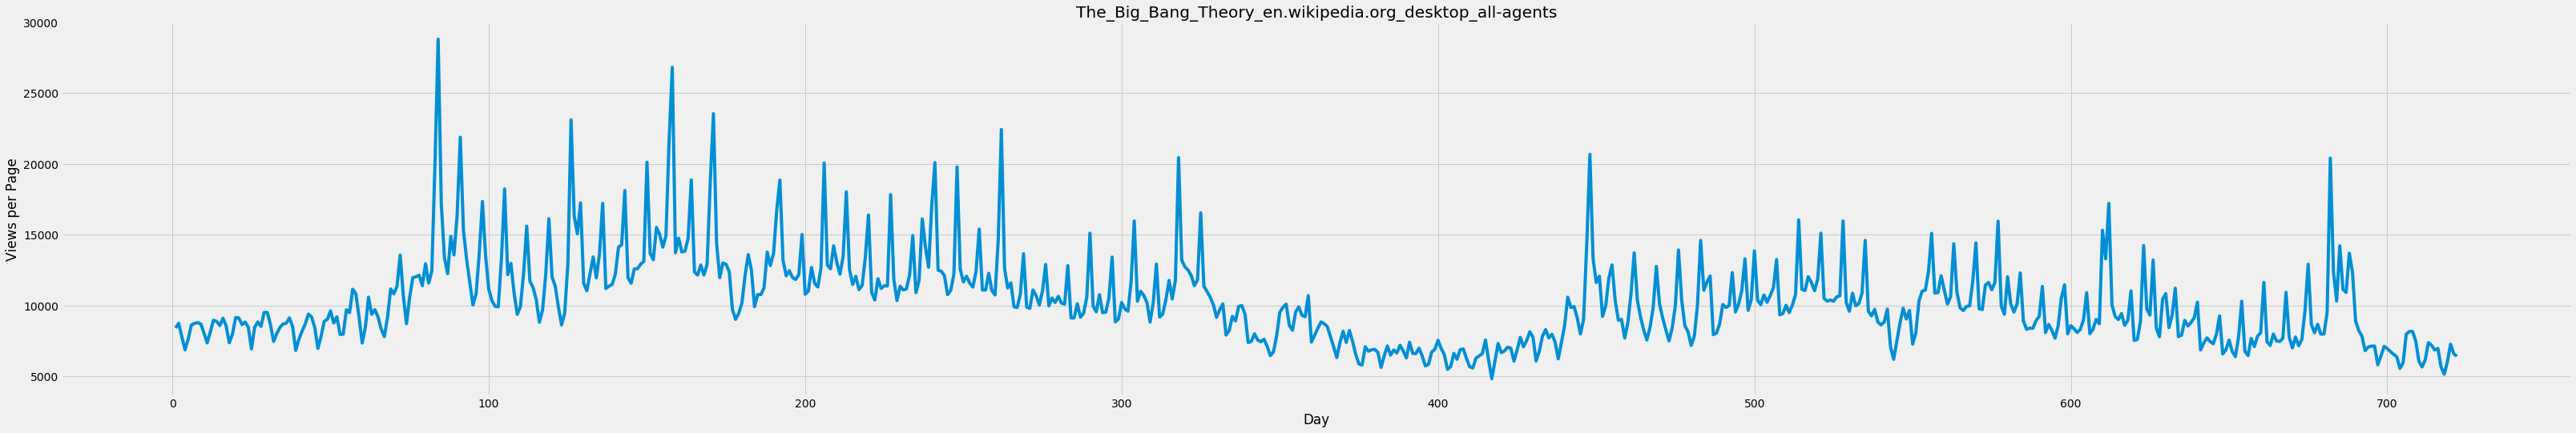

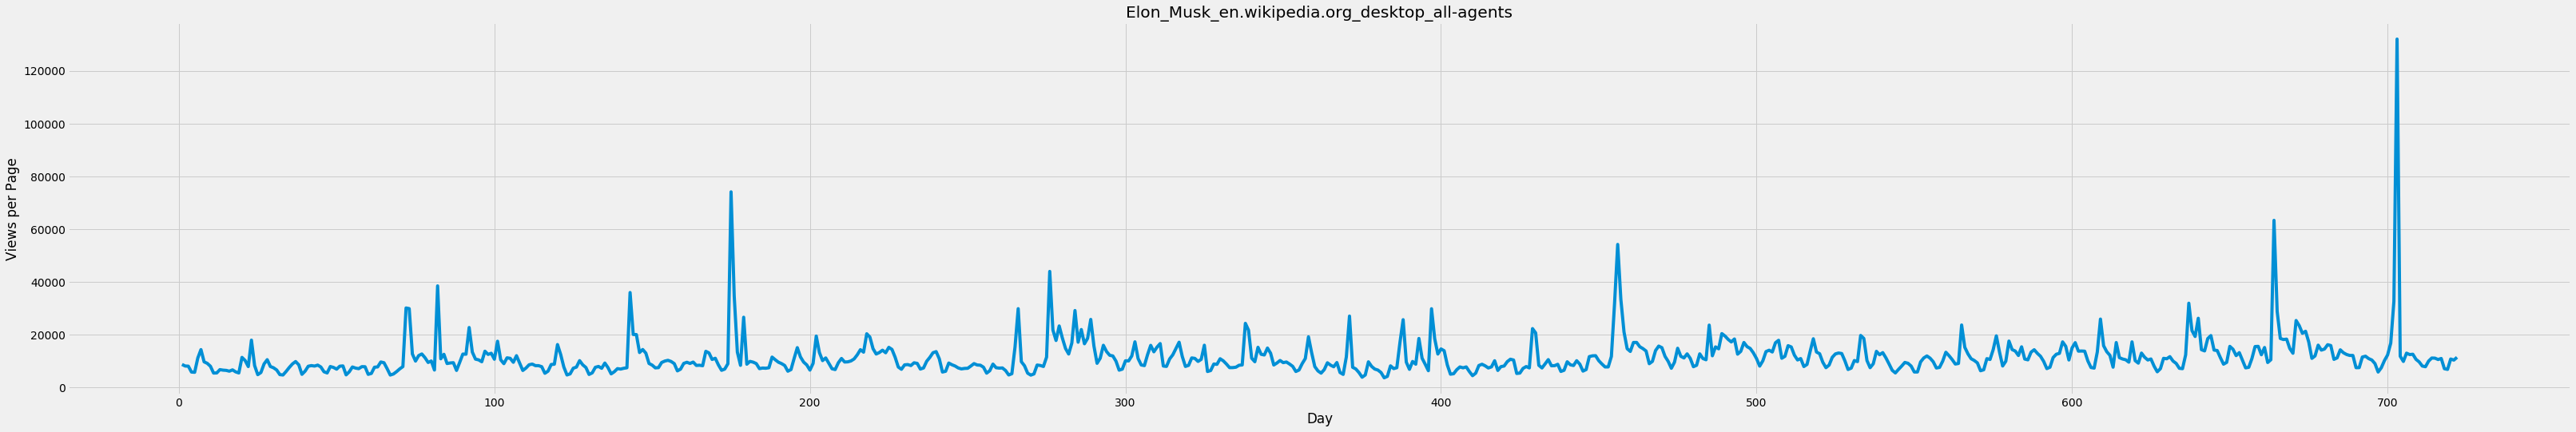

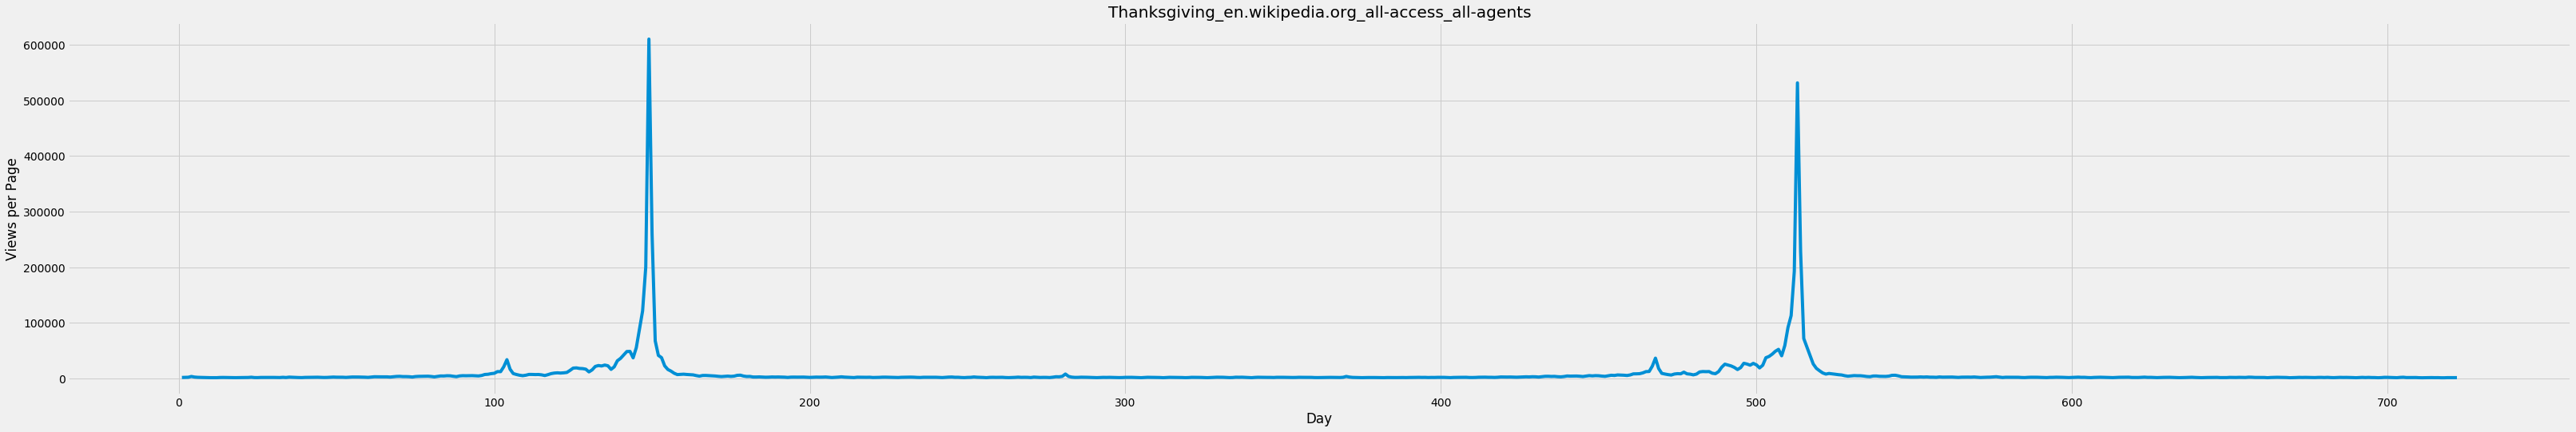

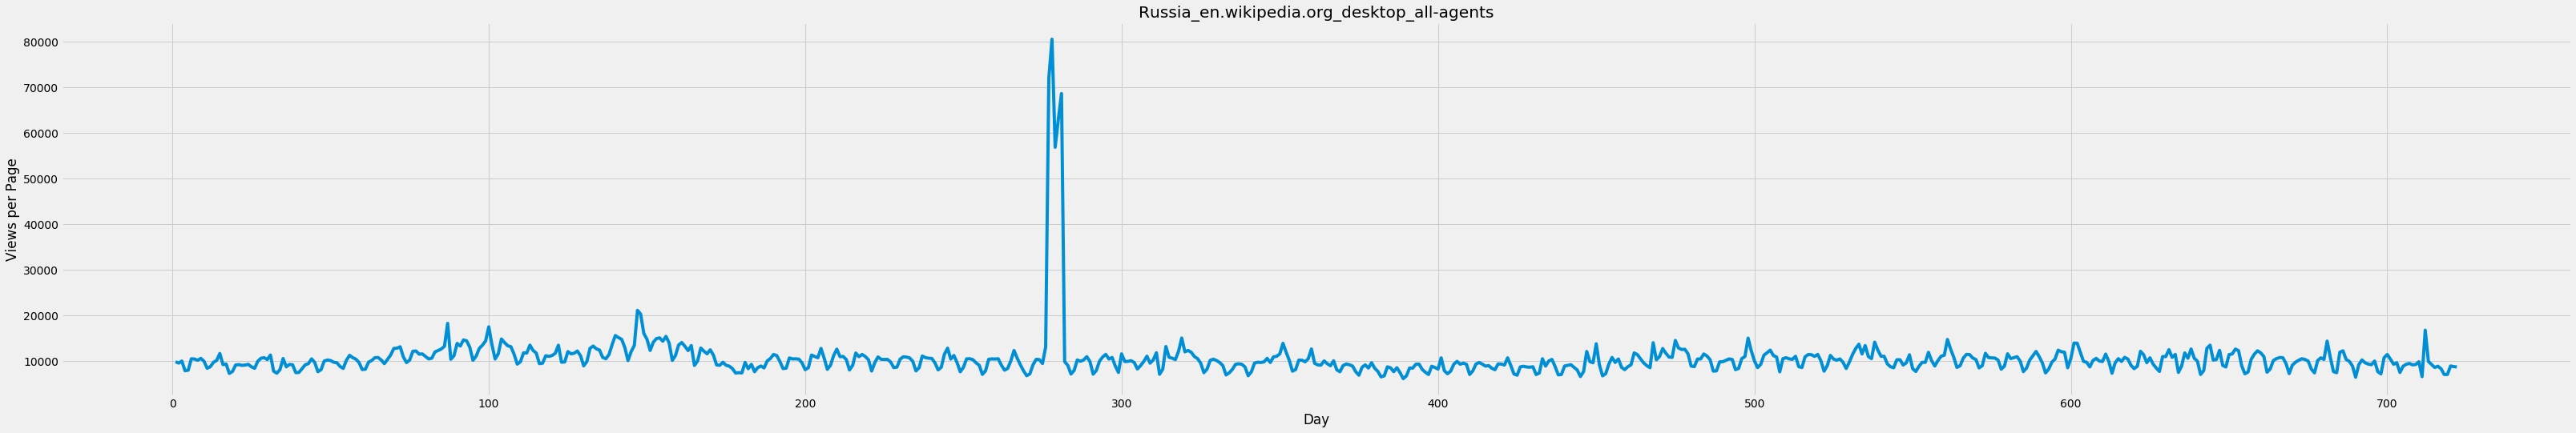

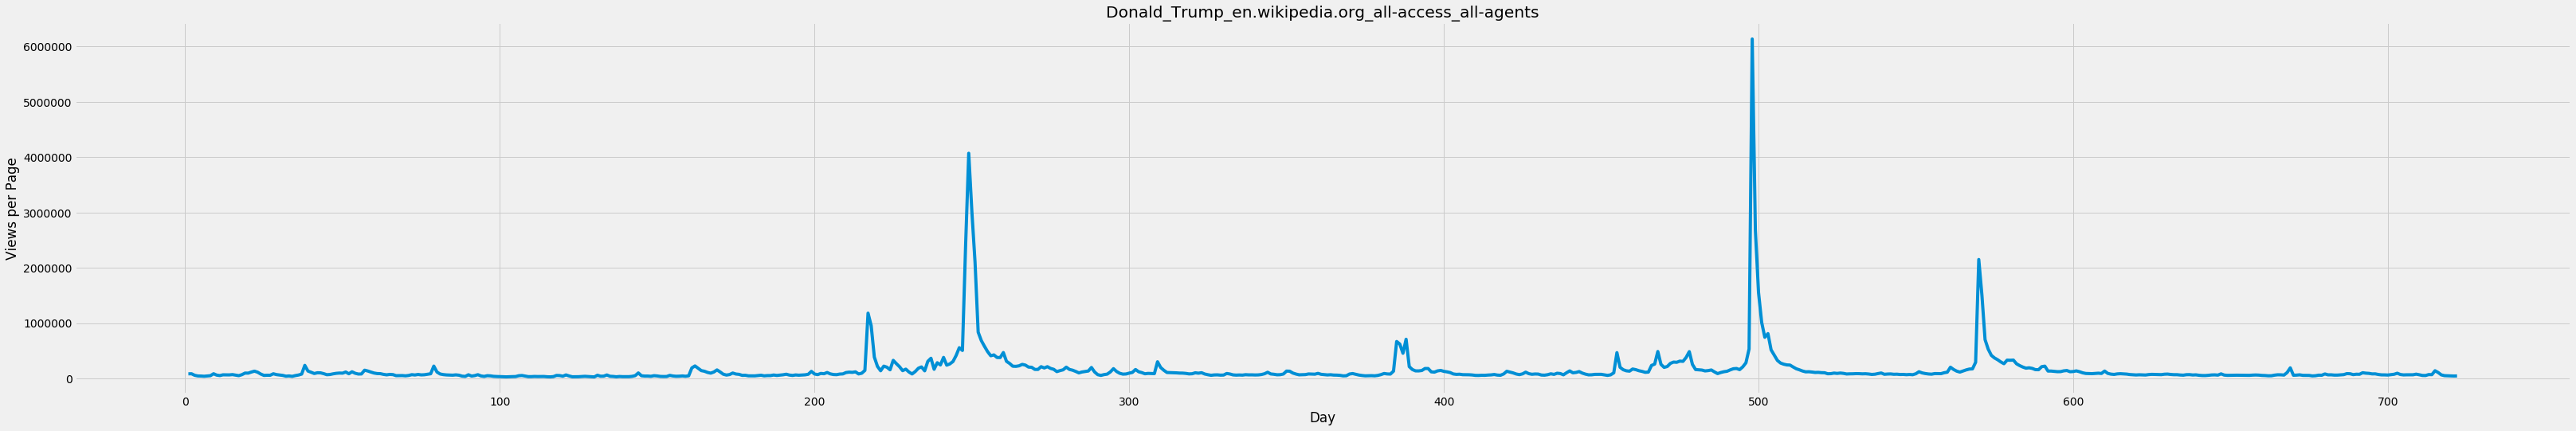

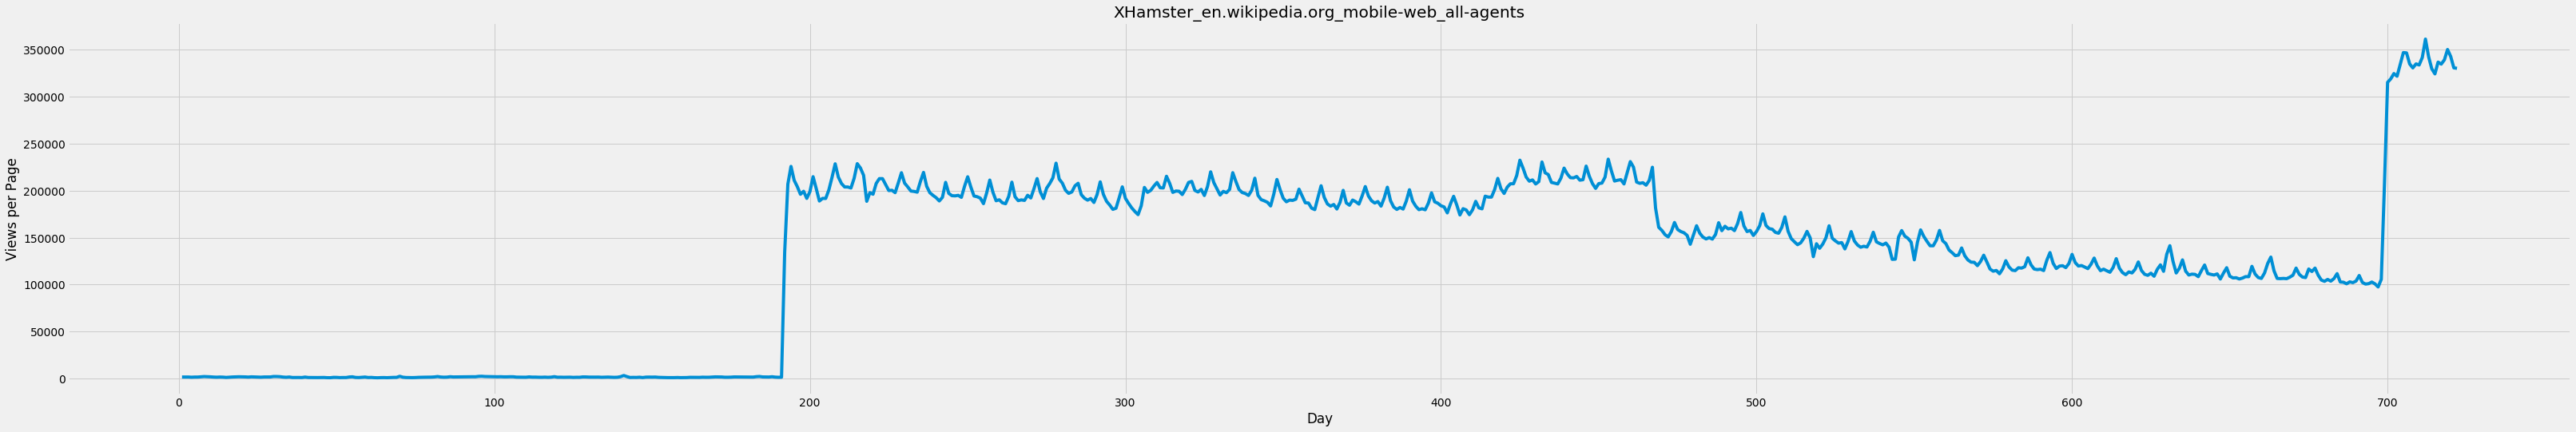

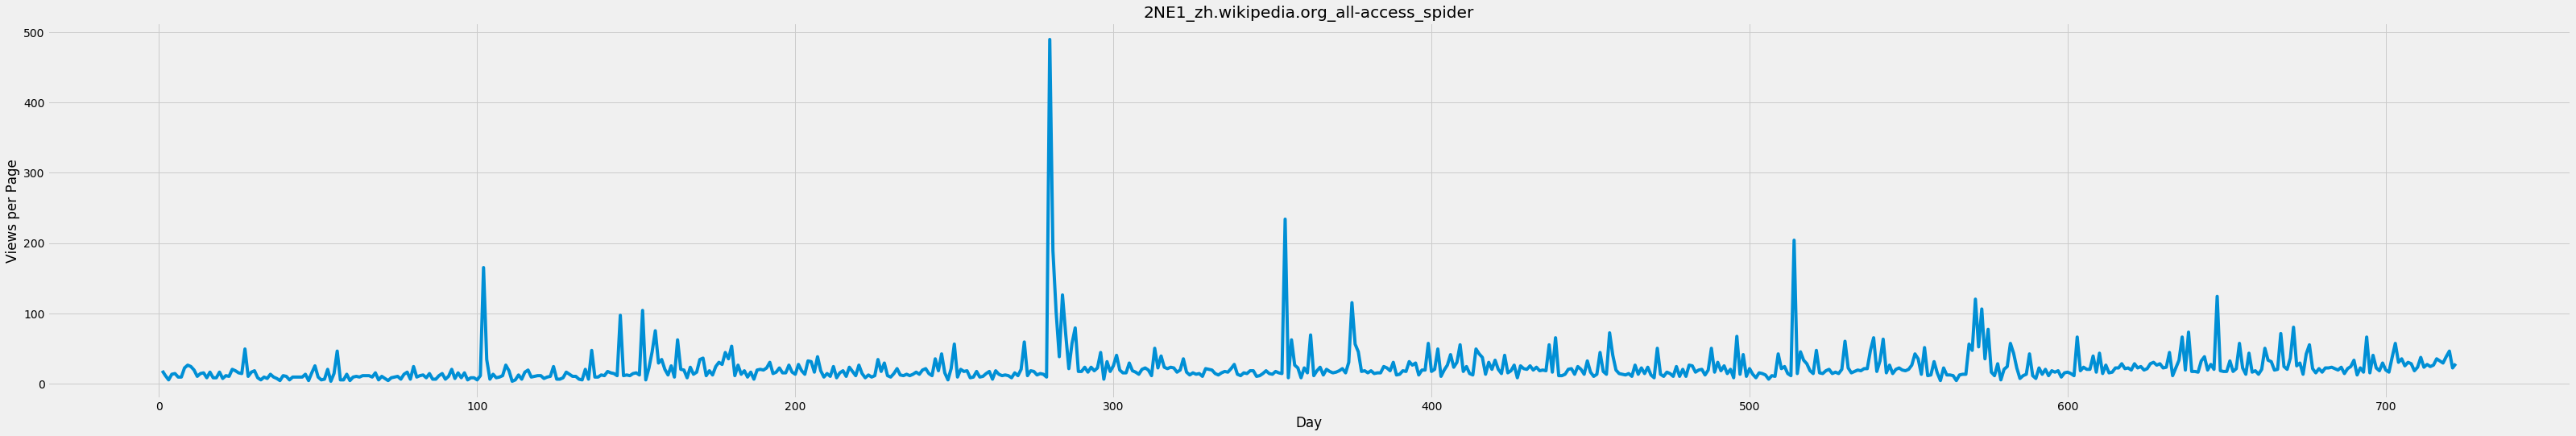

In [8]:
plot_visits(10513)
plot_visits(9033)
plot_visits(40734)
plot_visits(10271)
plot_visits(41072)
plot_visits(75127)
plot_visits(0)

In [9]:
def plotseasonal(res, axes):
    print(axes[0])
    axes[0].plot(res.observed)
    axes[0].set_ylabel('Observed')
    axes[1].plot(res.trend)
    axes[1].set_ylabel('Trend')
    axes[2].plot(res.seasonal)
    axes[2].set_ylabel('Seasonal')
    #axes[3].plot(res.resid)
    #axes[3].set_ylabel('Residual')

Axes(0.08,0.641765;0.395455x0.238235)
Axes(0.554545,0.641765;0.395455x0.238235)


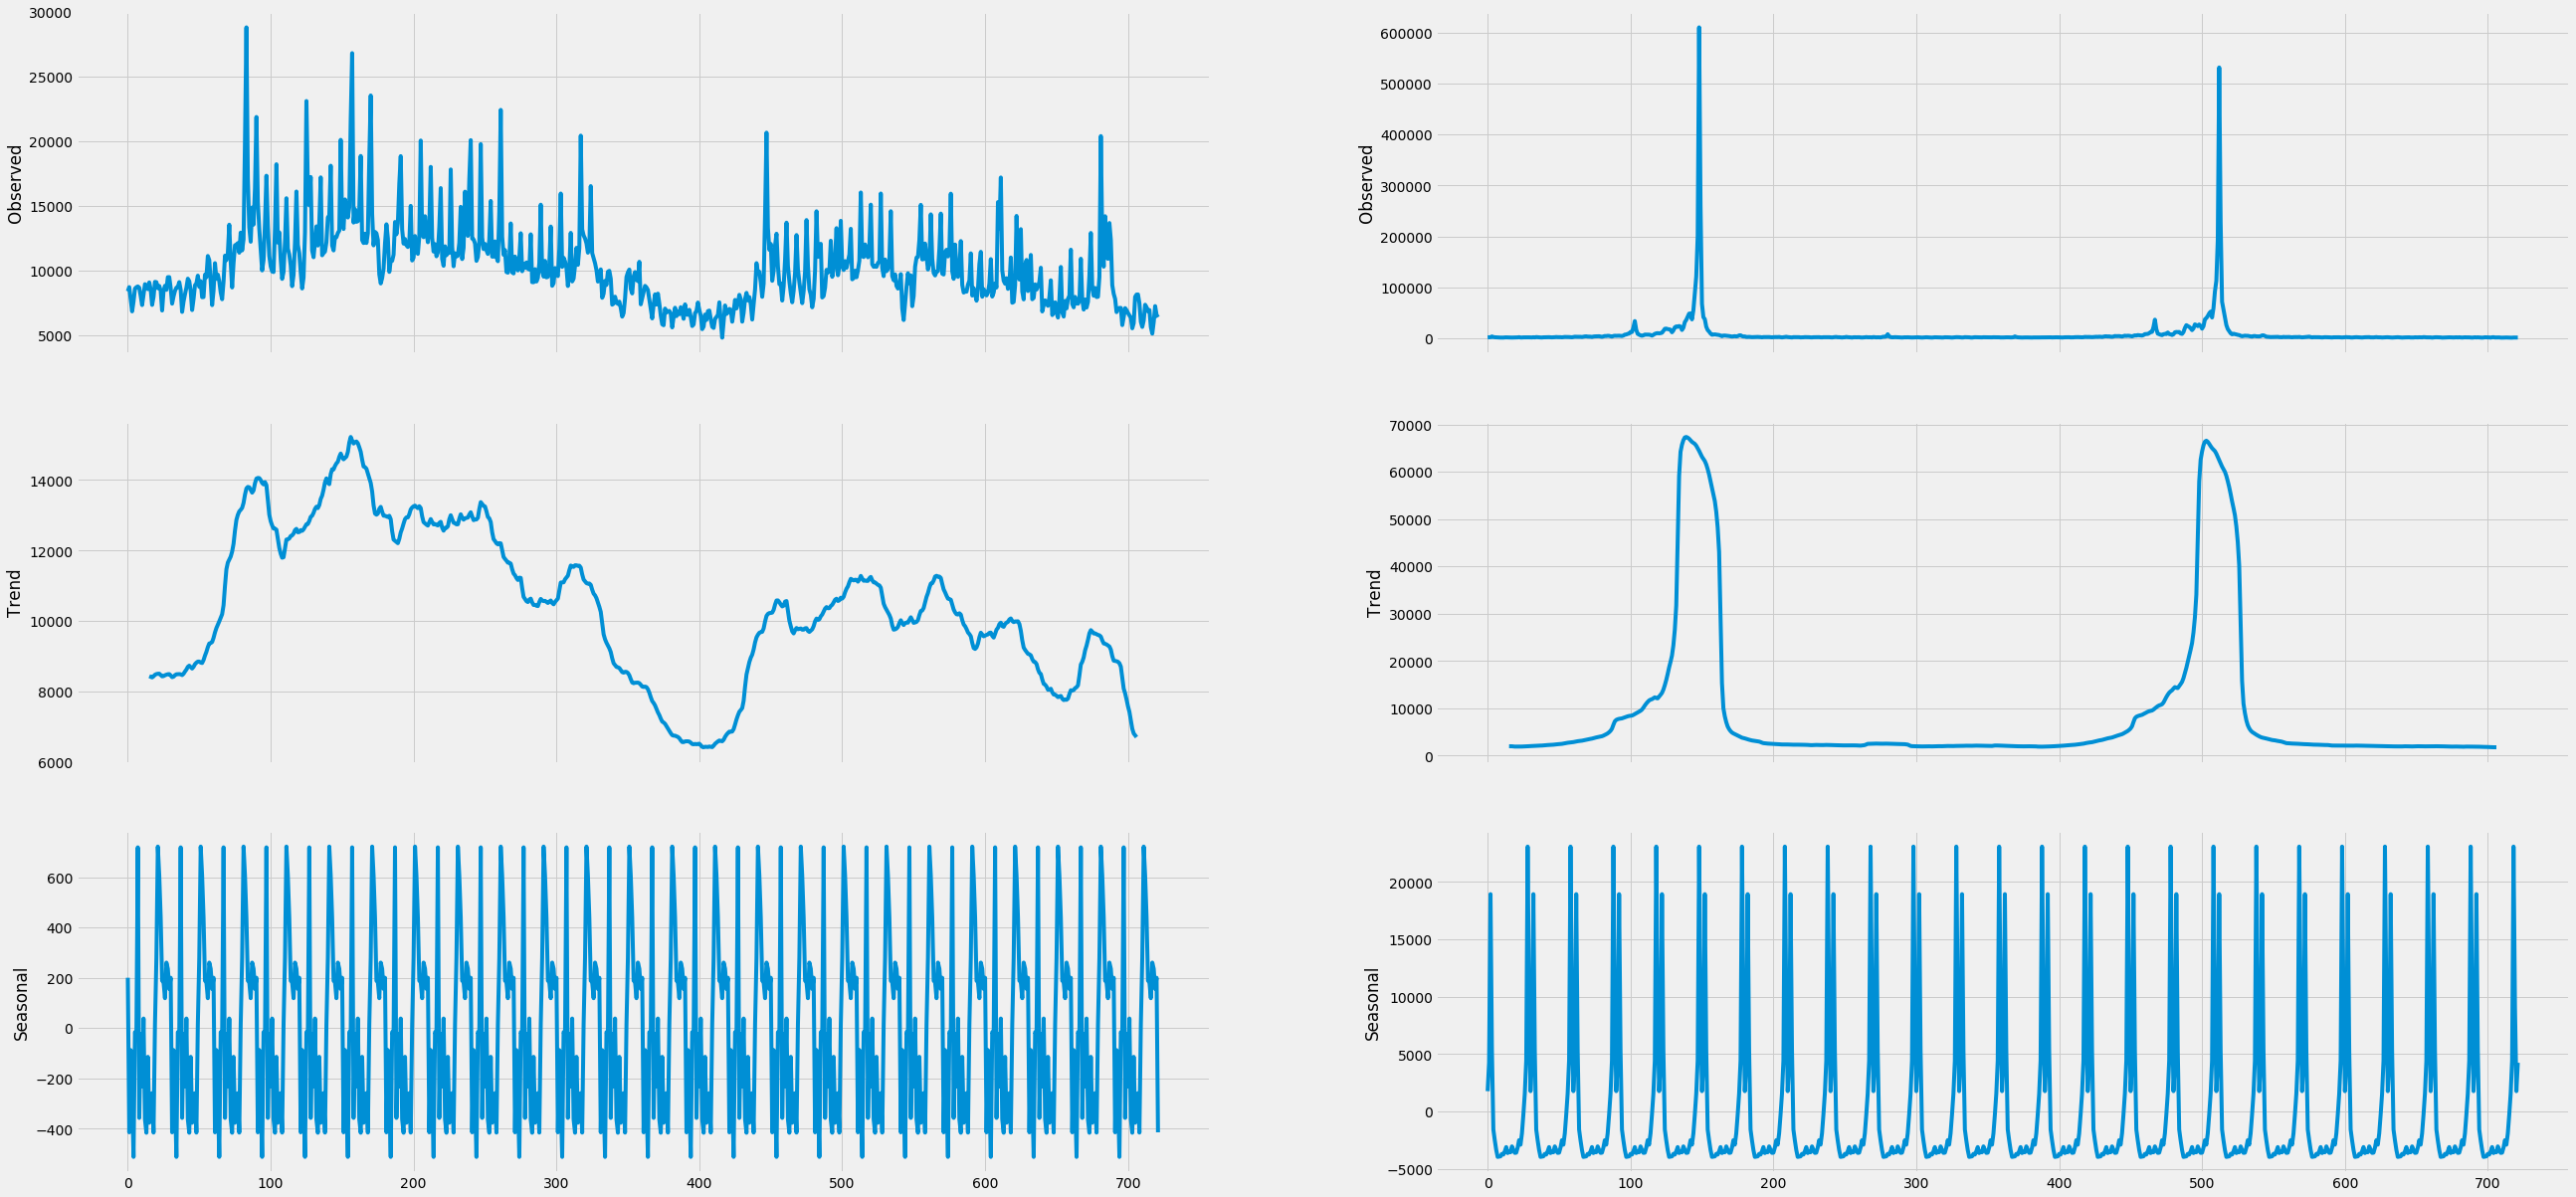

In [10]:
decomp1 = seasonal_decompose(train.loc[10513][1:].values.astype(np.int32), freq=30)
decomp2 = seasonal_decompose(train.loc[40734][1:].values.astype(np.int32), freq=30)

fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(40,20))

plotseasonal(decomp1, axes[:,0])
plotseasonal(decomp2, axes[:,1])
plt.show()

Axes(0.08,0.641765;0.395455x0.238235)
Axes(0.554545,0.641765;0.395455x0.238235)


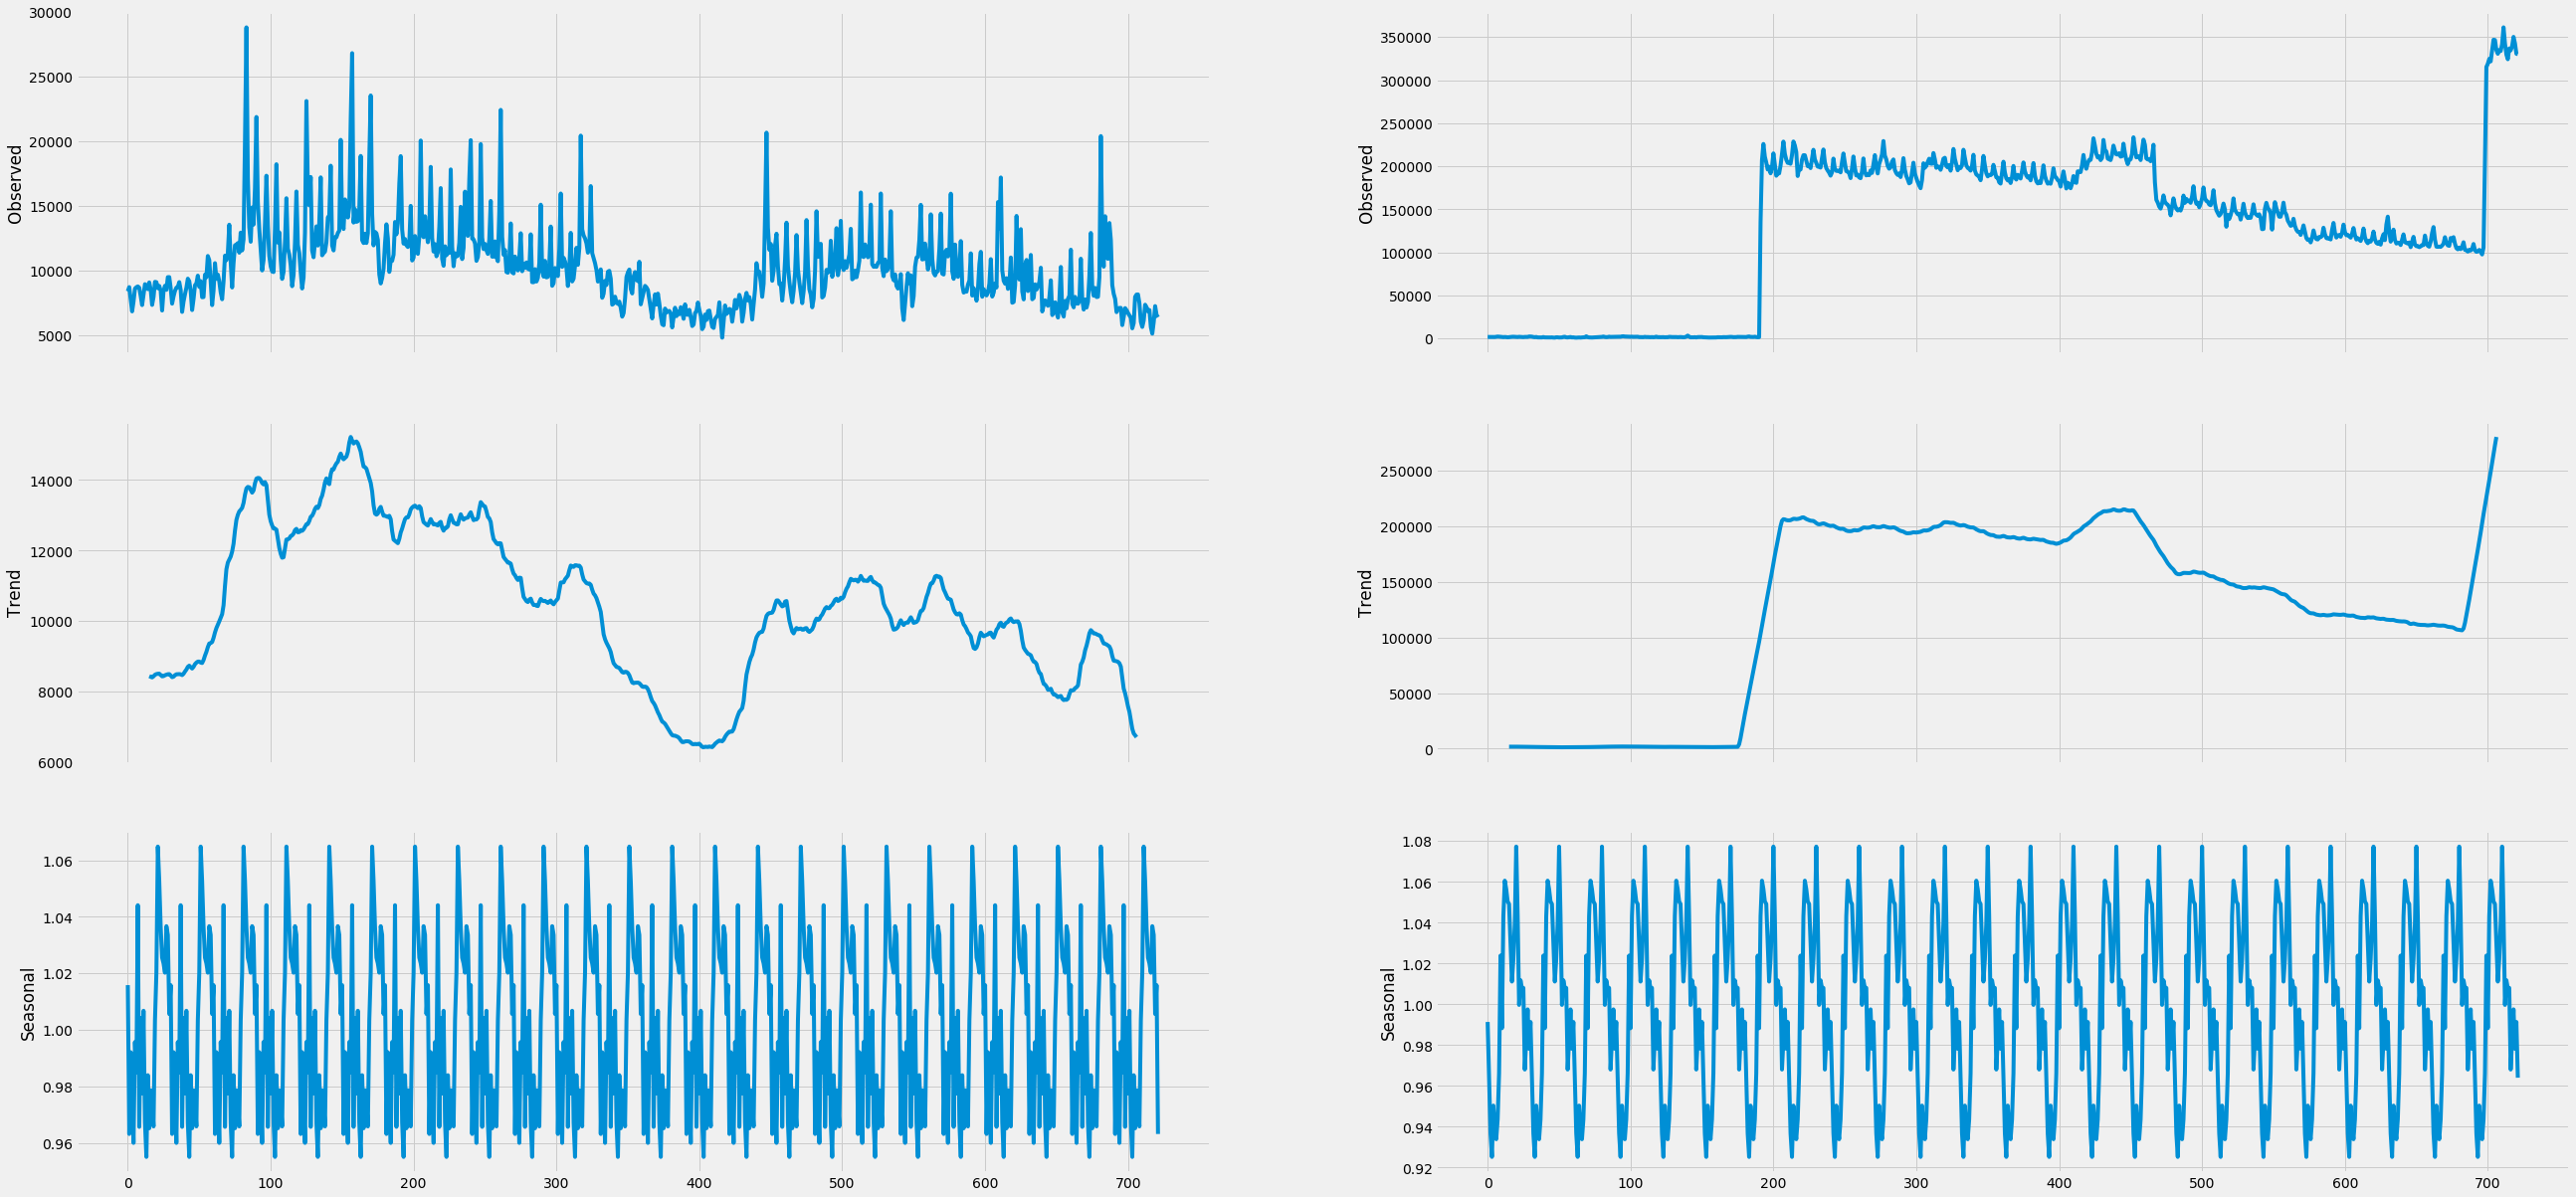

In [11]:
decomp1 = seasonal_decompose(train.loc[10513][1:].values.astype(np.int32), model='multiplicative', freq=30)
decomp2 = seasonal_decompose(train.loc[75127][1:].values.astype(np.int32), model='multiplicative', freq=30)

fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(40,20))

plotseasonal(decomp1, axes[:,0])
plotseasonal(decomp2, axes[:,1])
plt.show()

Axes(0.08,0.641765;0.87x0.238235)


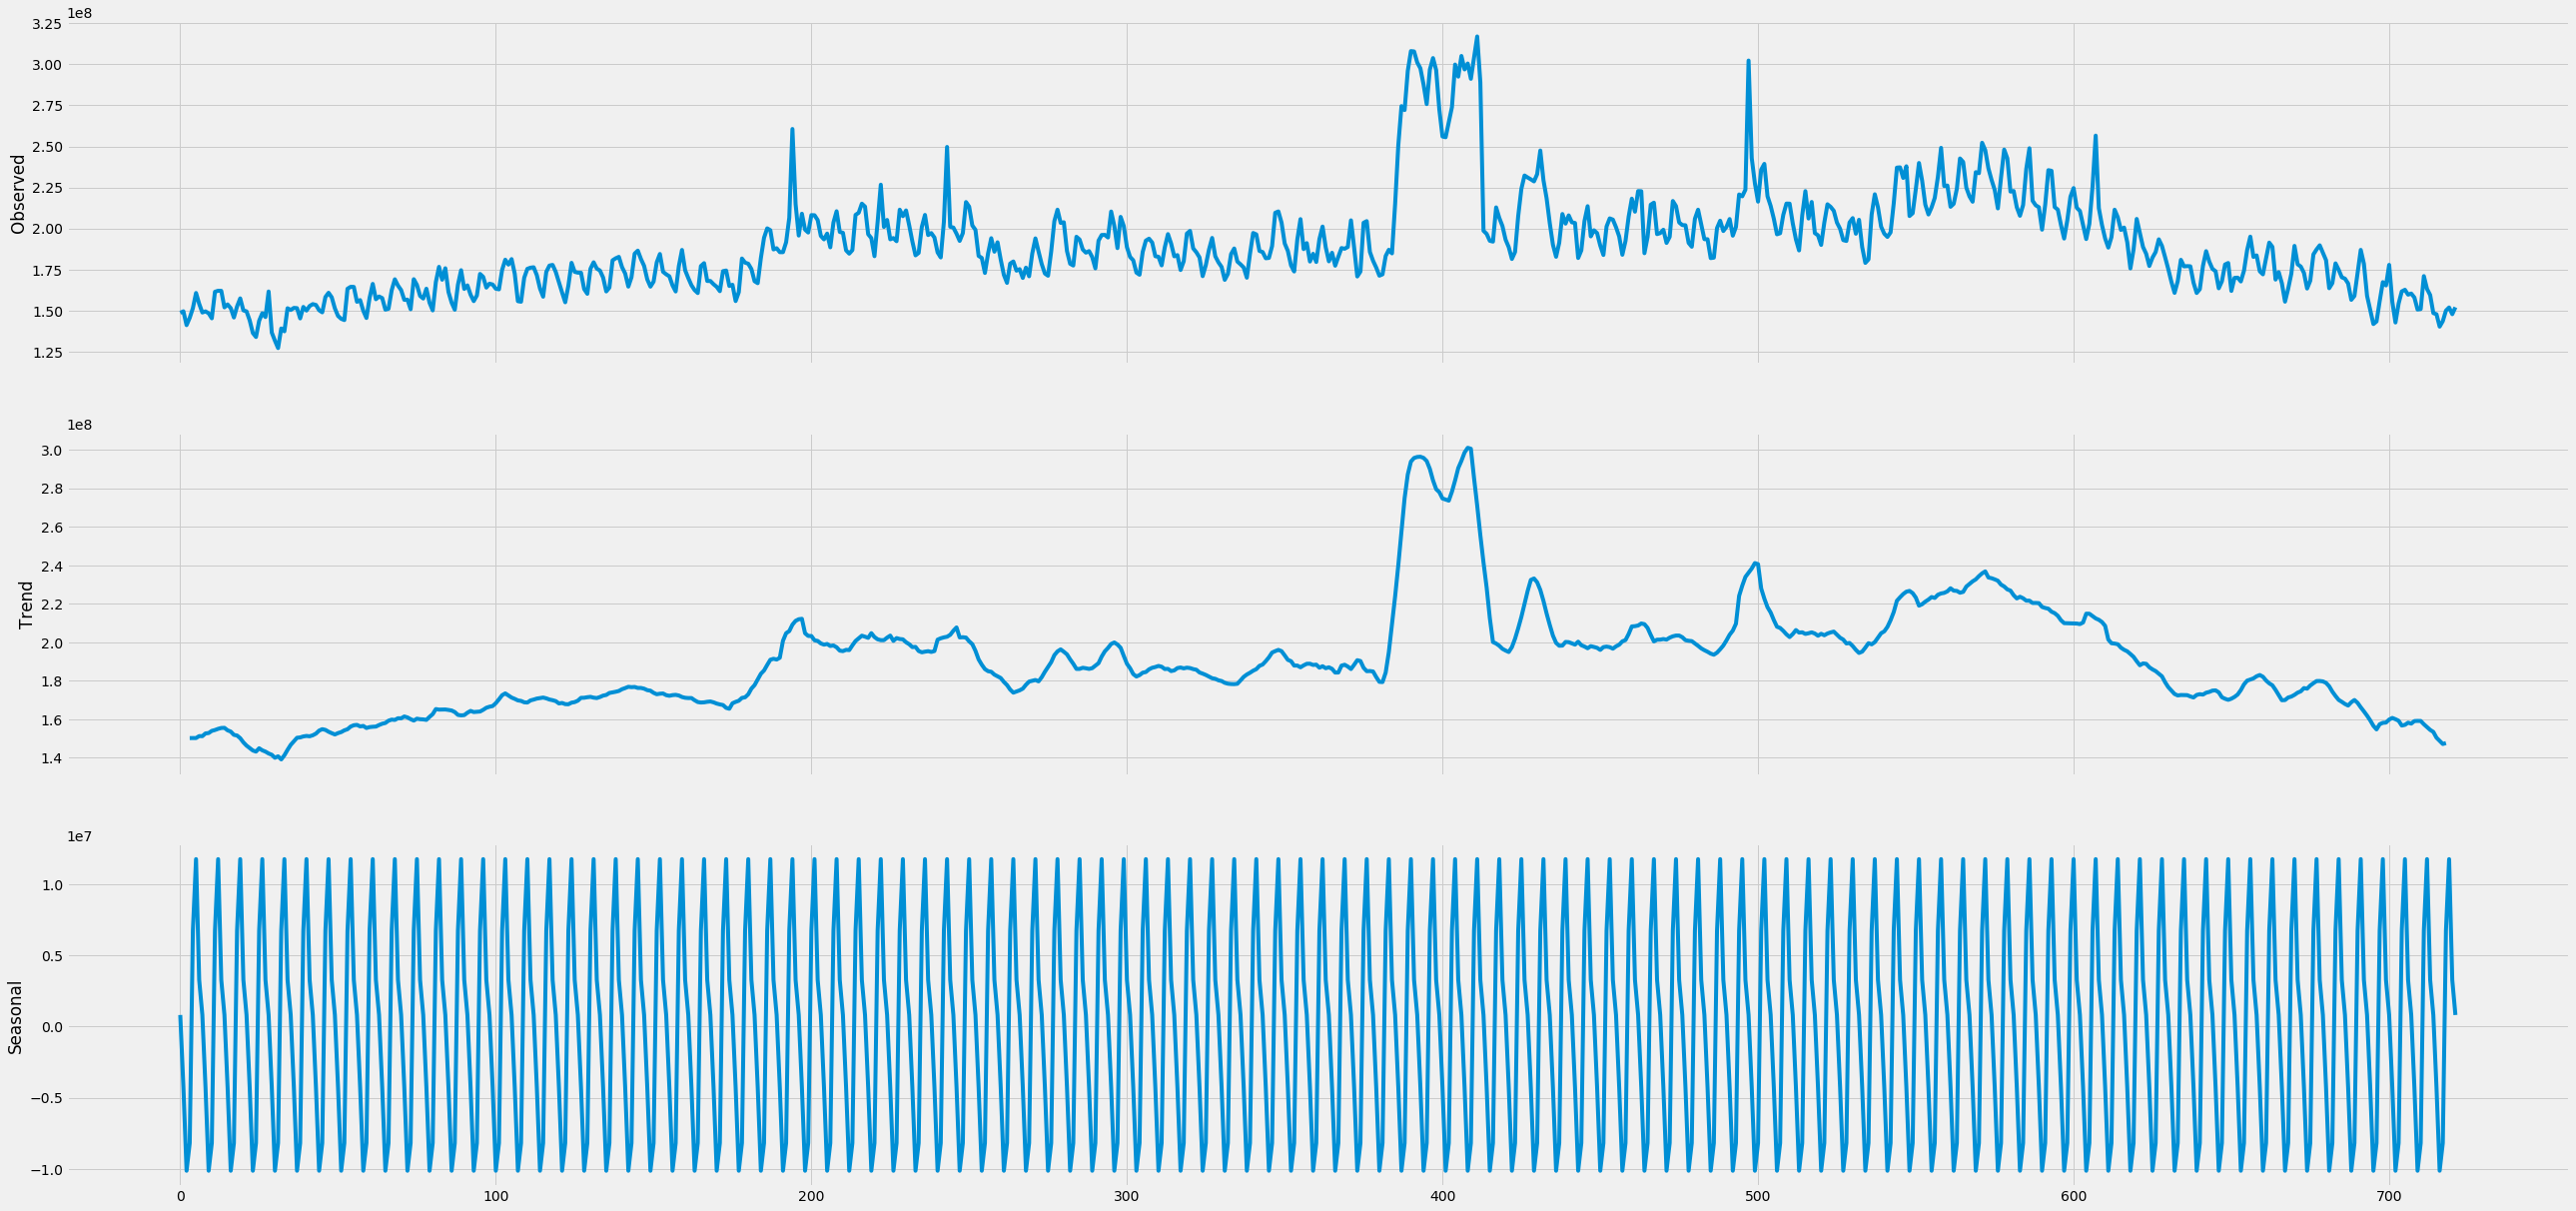

In [12]:
decomp = seasonal_decompose(sum_train.astype(np.int32), freq=7)
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(40,20))
plotseasonal(decomp, axes)
plt.show()

In [13]:
weekday=["Wednesday","Thursday","Friday","Saturday","Sunday","Monday","Tuesday"]
colors=["red", "blue", "green", "magenta", "cyan", "orange", "gray"]
def plot_weekday(visits):
    
    weekday_visits = []
    
    for day in range(7):
        weekday_visits.append(visits[day::7])
    
    weeks=np.arange(1, len(weekday_visits[0]))

    plt.figure(figsize=(40, 16))
    handles=[]
    for days in range(len(weekday_visits)):
        handle, = plt.plot(np.arange(len(weekday_visits[days])), weekday_visits[days], label=weekday[days], color=colors[days])
        handles.append(handle)
    plt.legend(handles, weekday)
    plt.title("Visits on differtent week days")
    plt.ylabel('Sum of views')
    plt.xlabel('Weeks')
    plt.show()

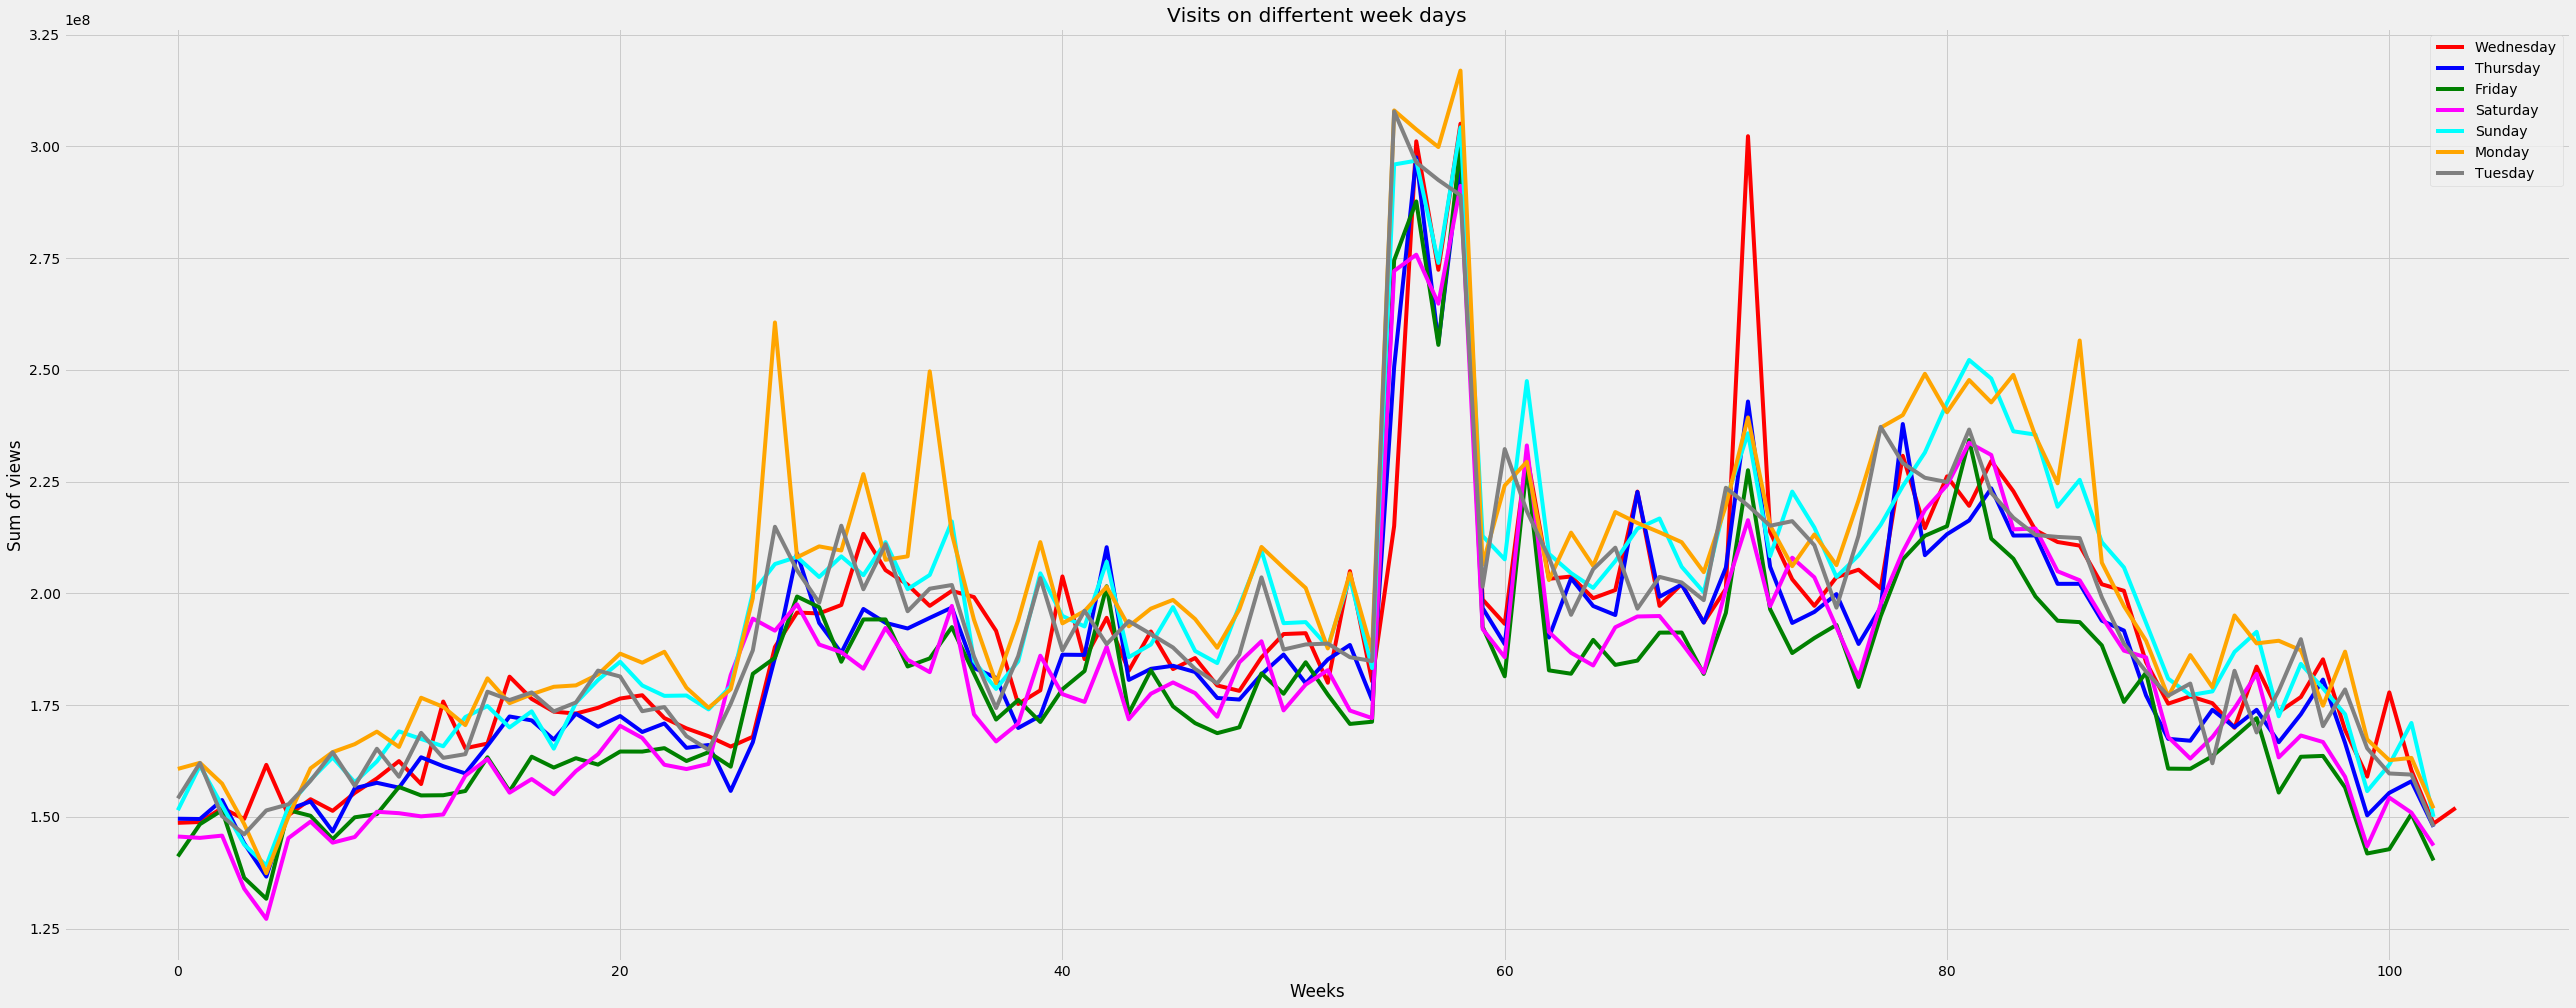

In [14]:
plot_weekday(sum_train)

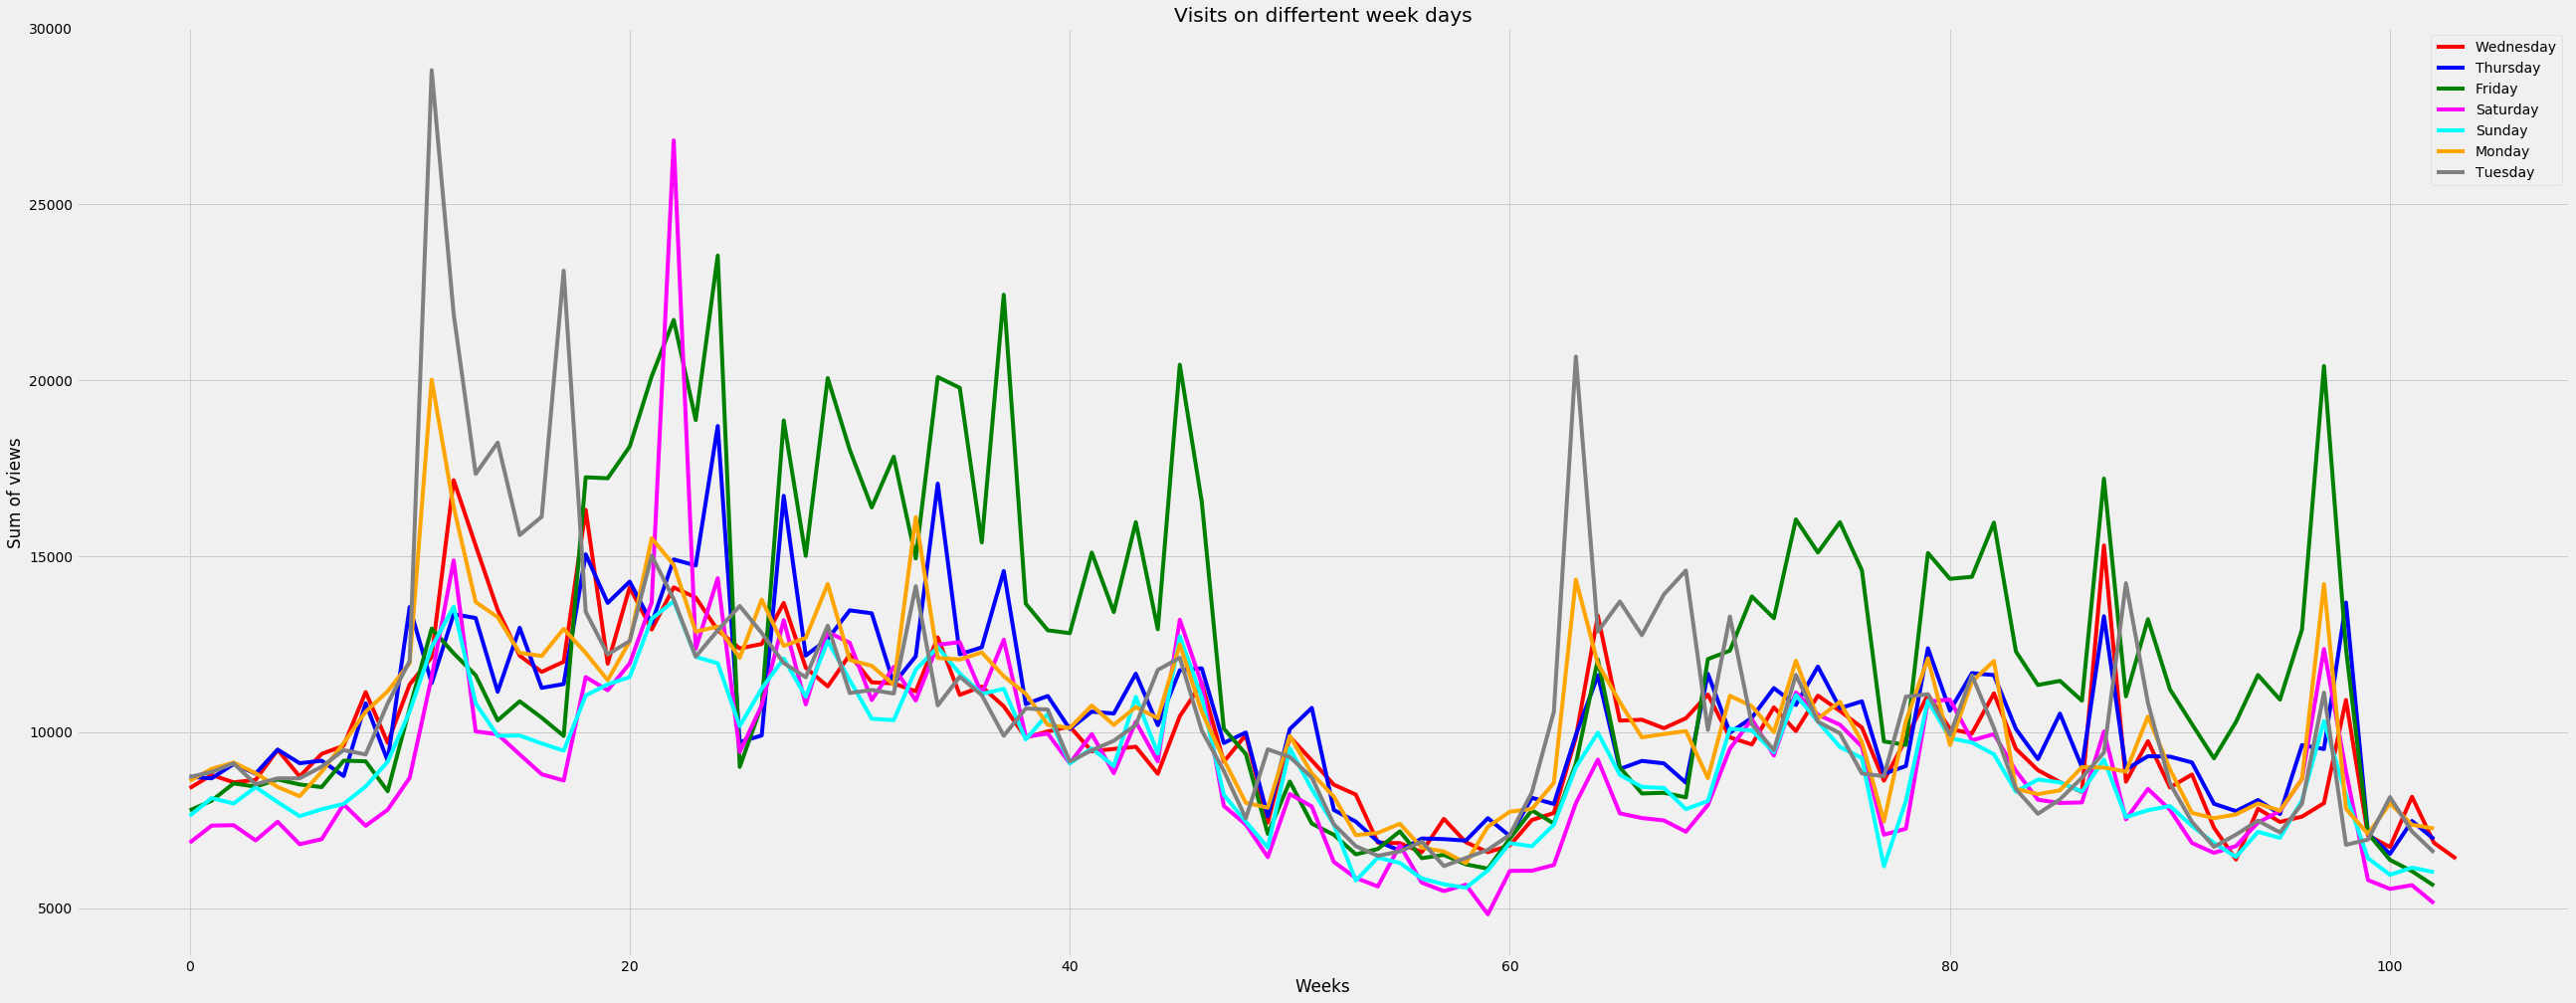

In [15]:
plot_weekday(train.loc[10513][1:])

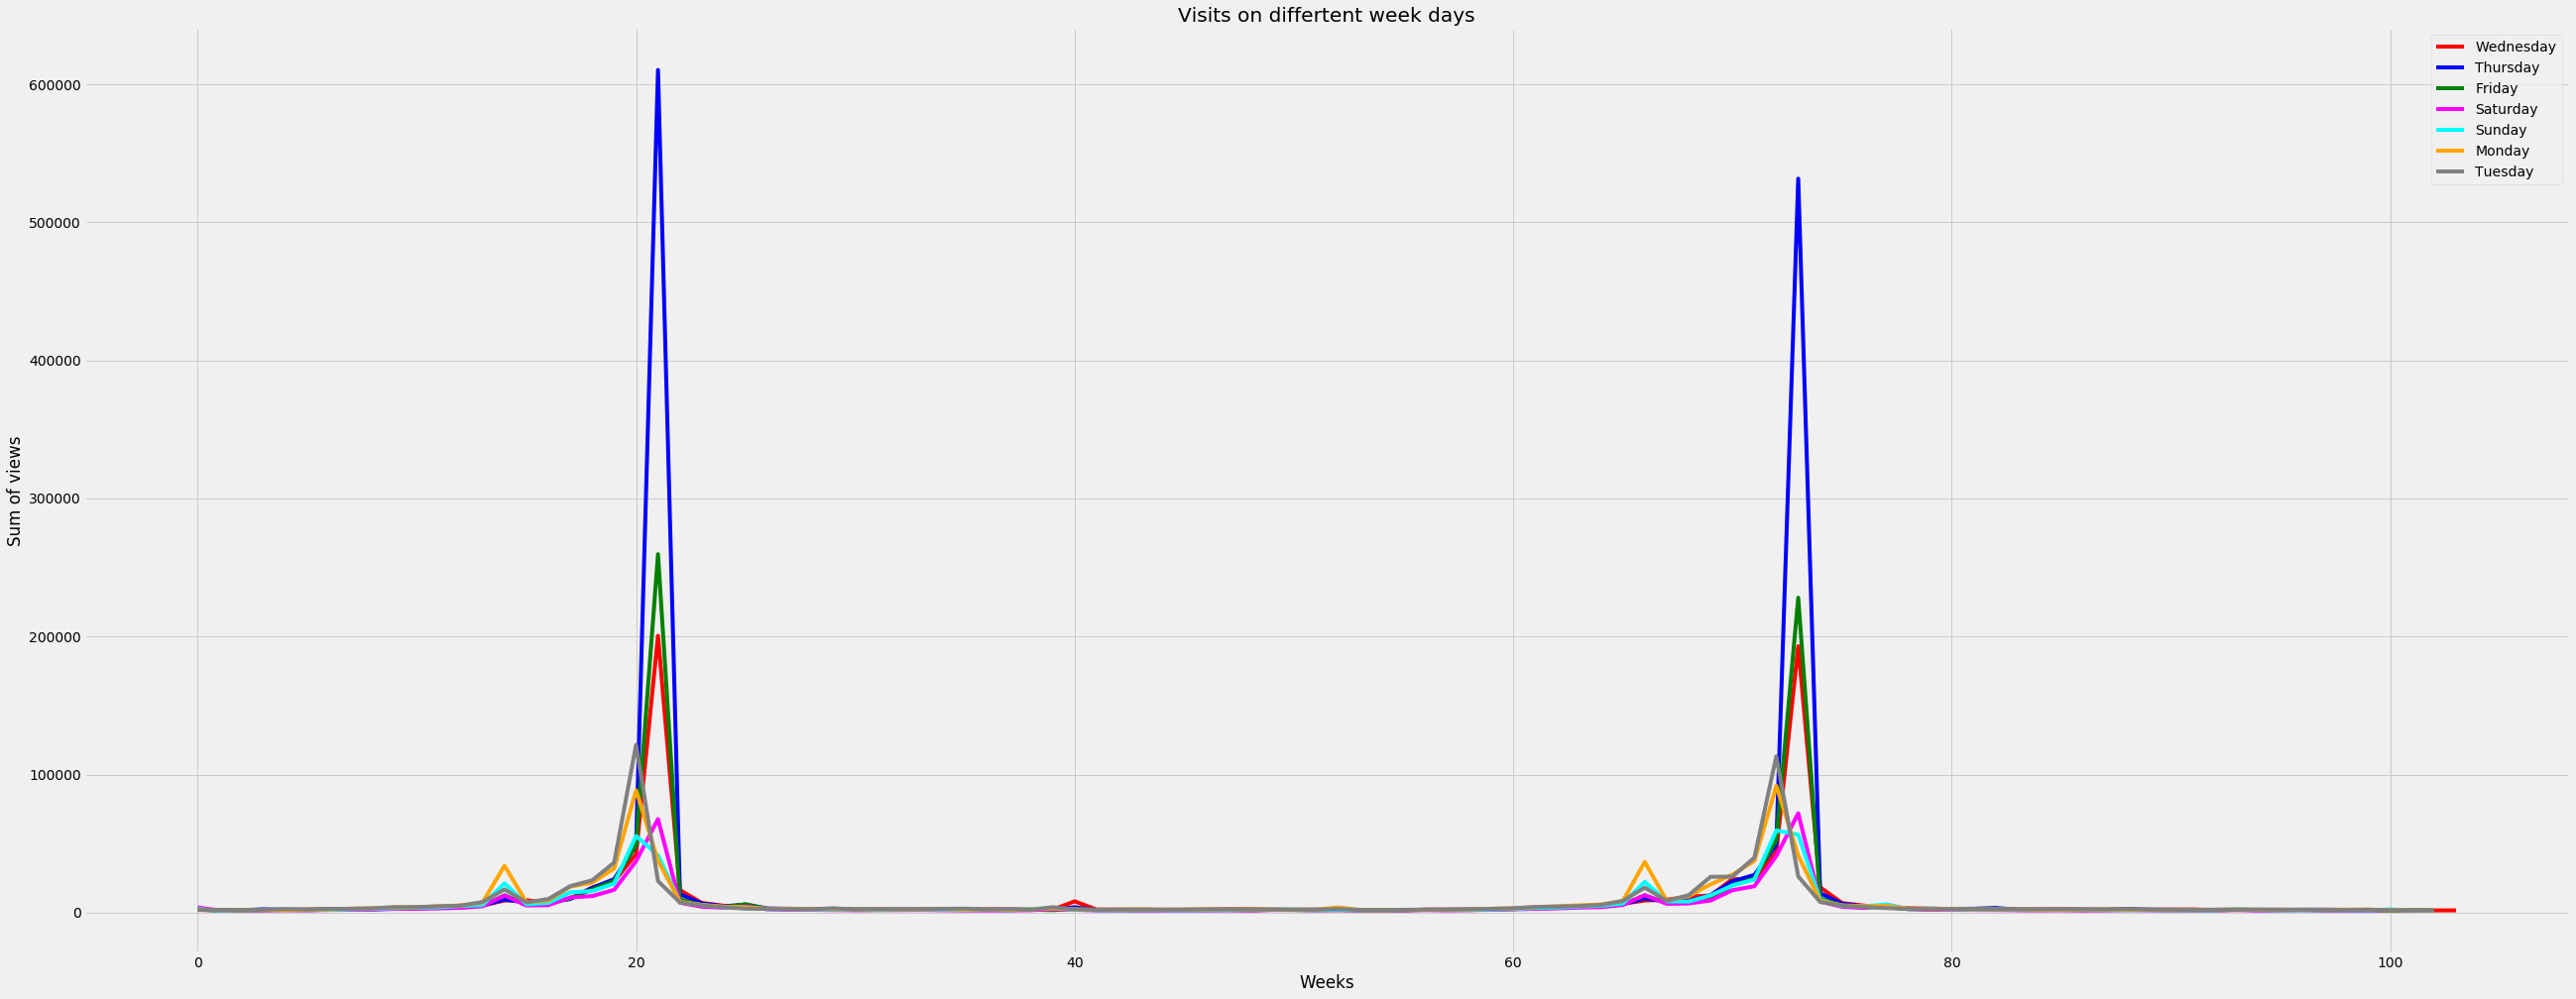

In [16]:
plot_weekday(train.loc[40734][1:])

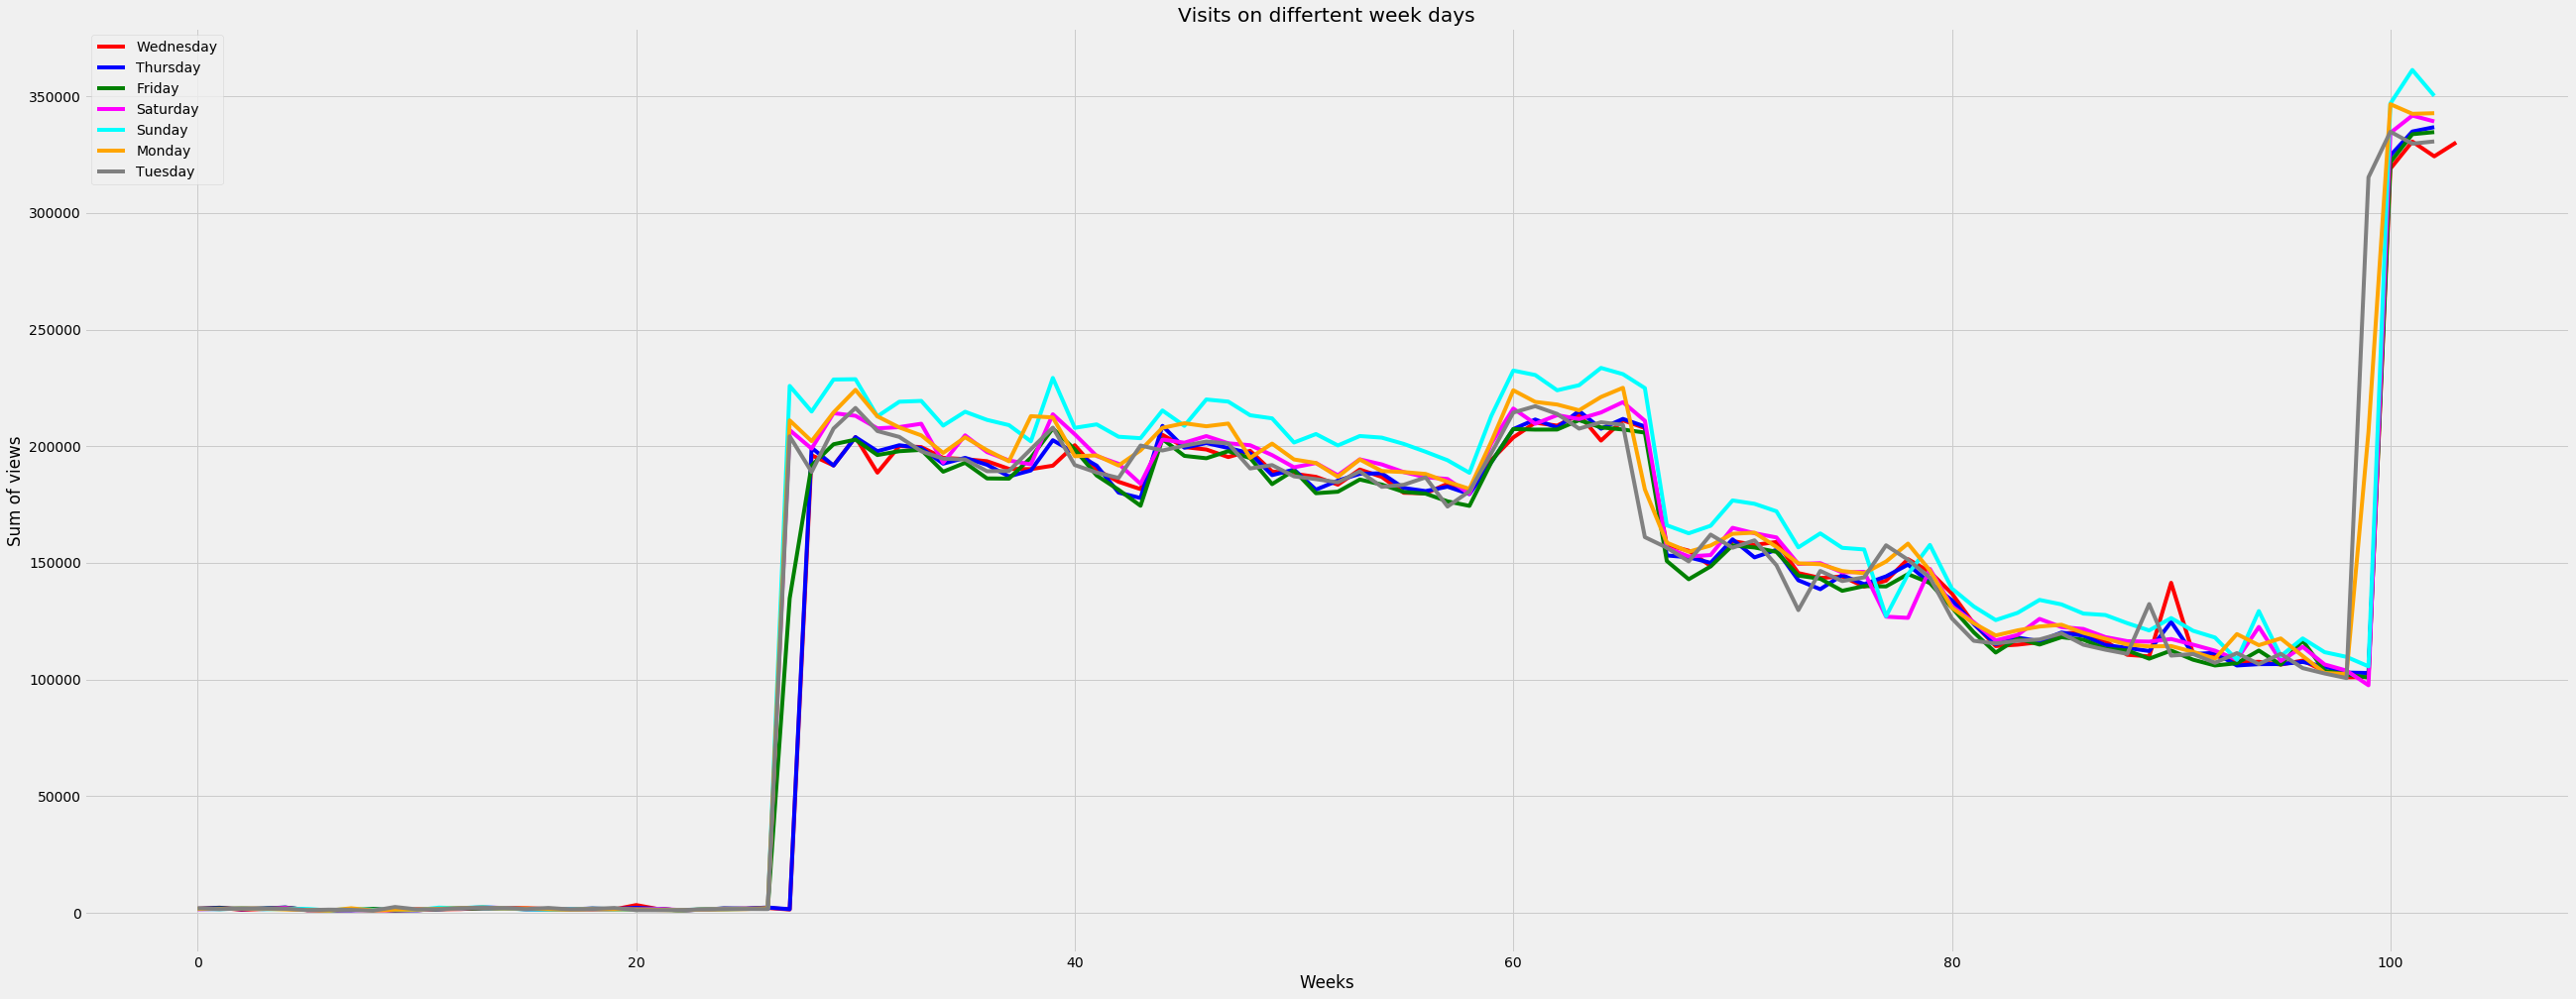

In [17]:
plot_weekday(train.loc[75127][1:])

This part allowed us to prepare our data. We had created new features that we use in the next steps. Days, Months, Years are interesting to forecast with a Machine Learning Approach or to do an analysis. 
If you have another idea to improve this first part: Fork this notebook and improve it or share your idea in the comments.

# <h1><center>II. Aggregation & Visualisation

In [60]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

NameError: name 'train_flattened' is not defined

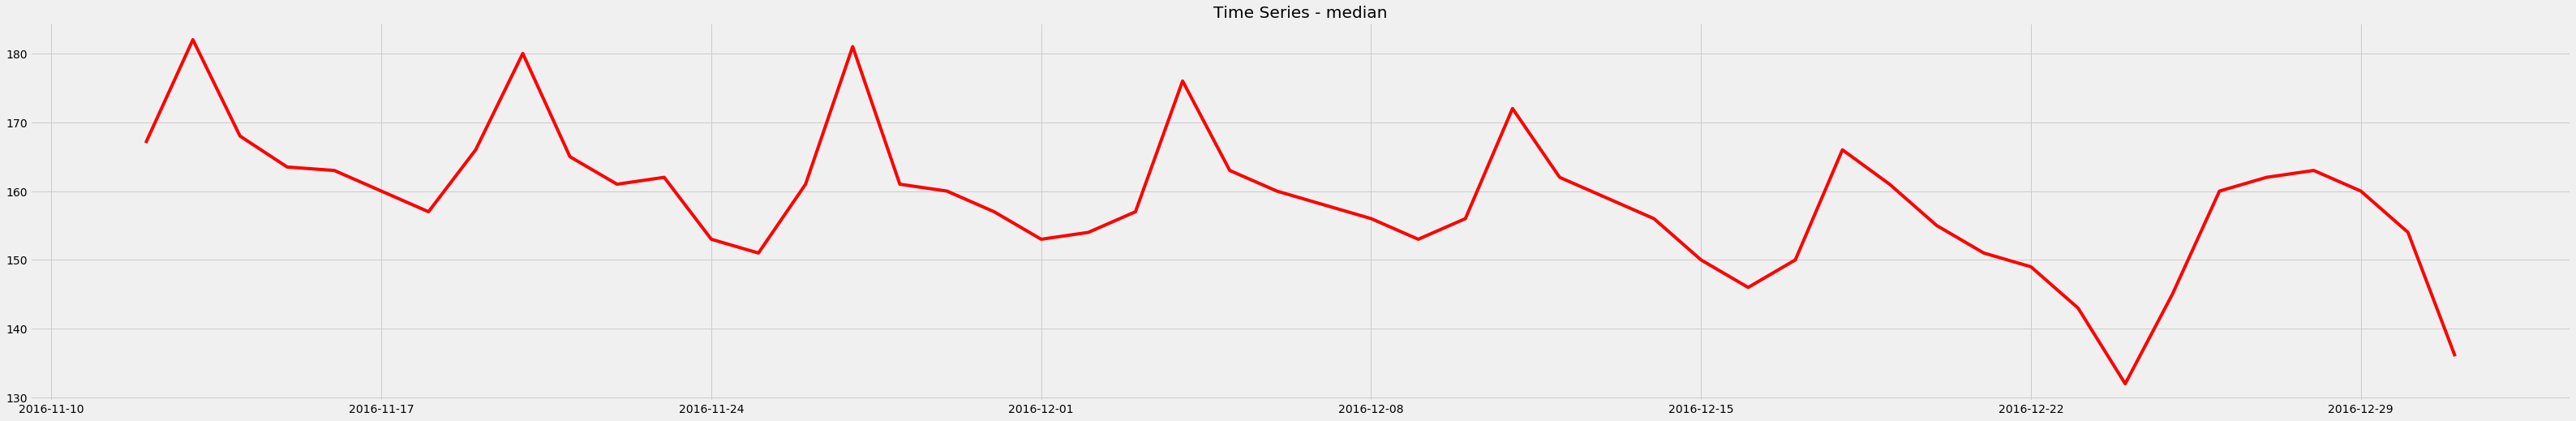

In [24]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

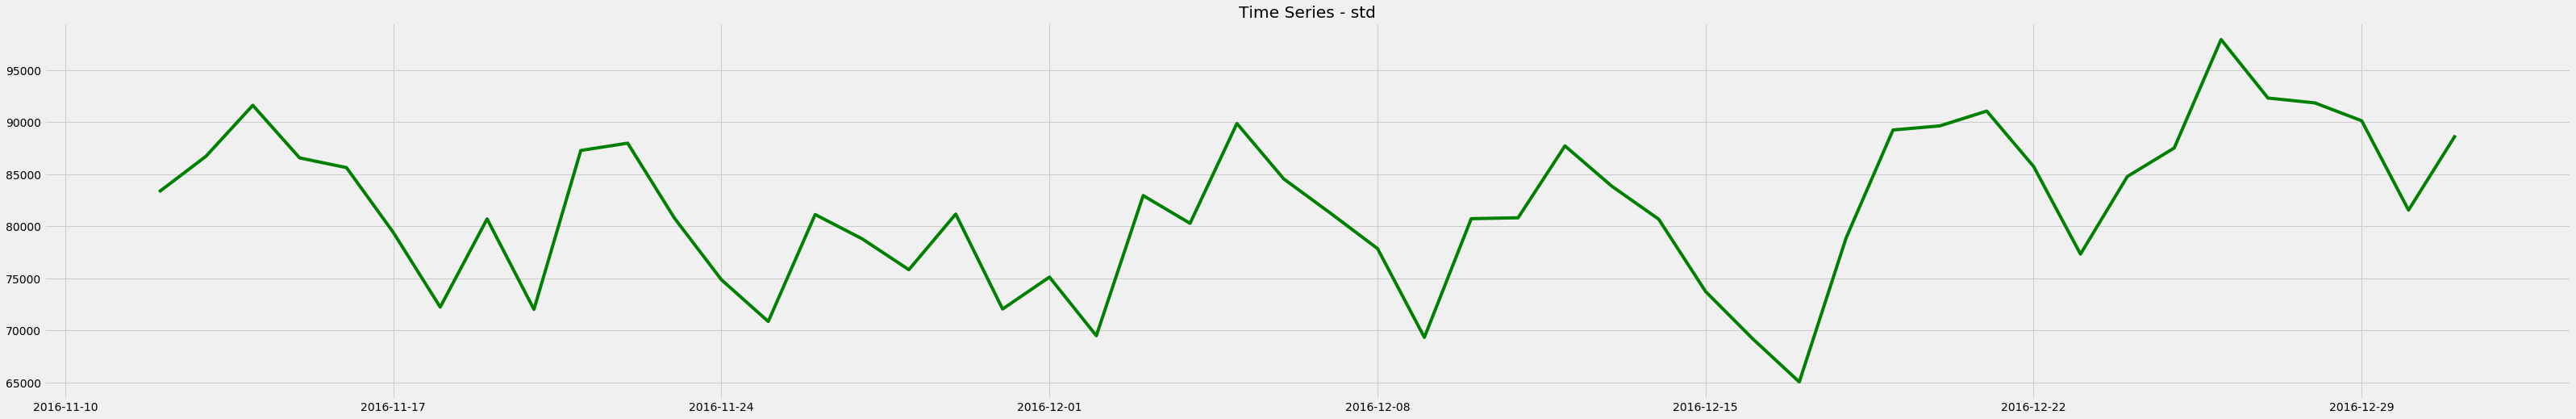

In [25]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

In [26]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [27]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

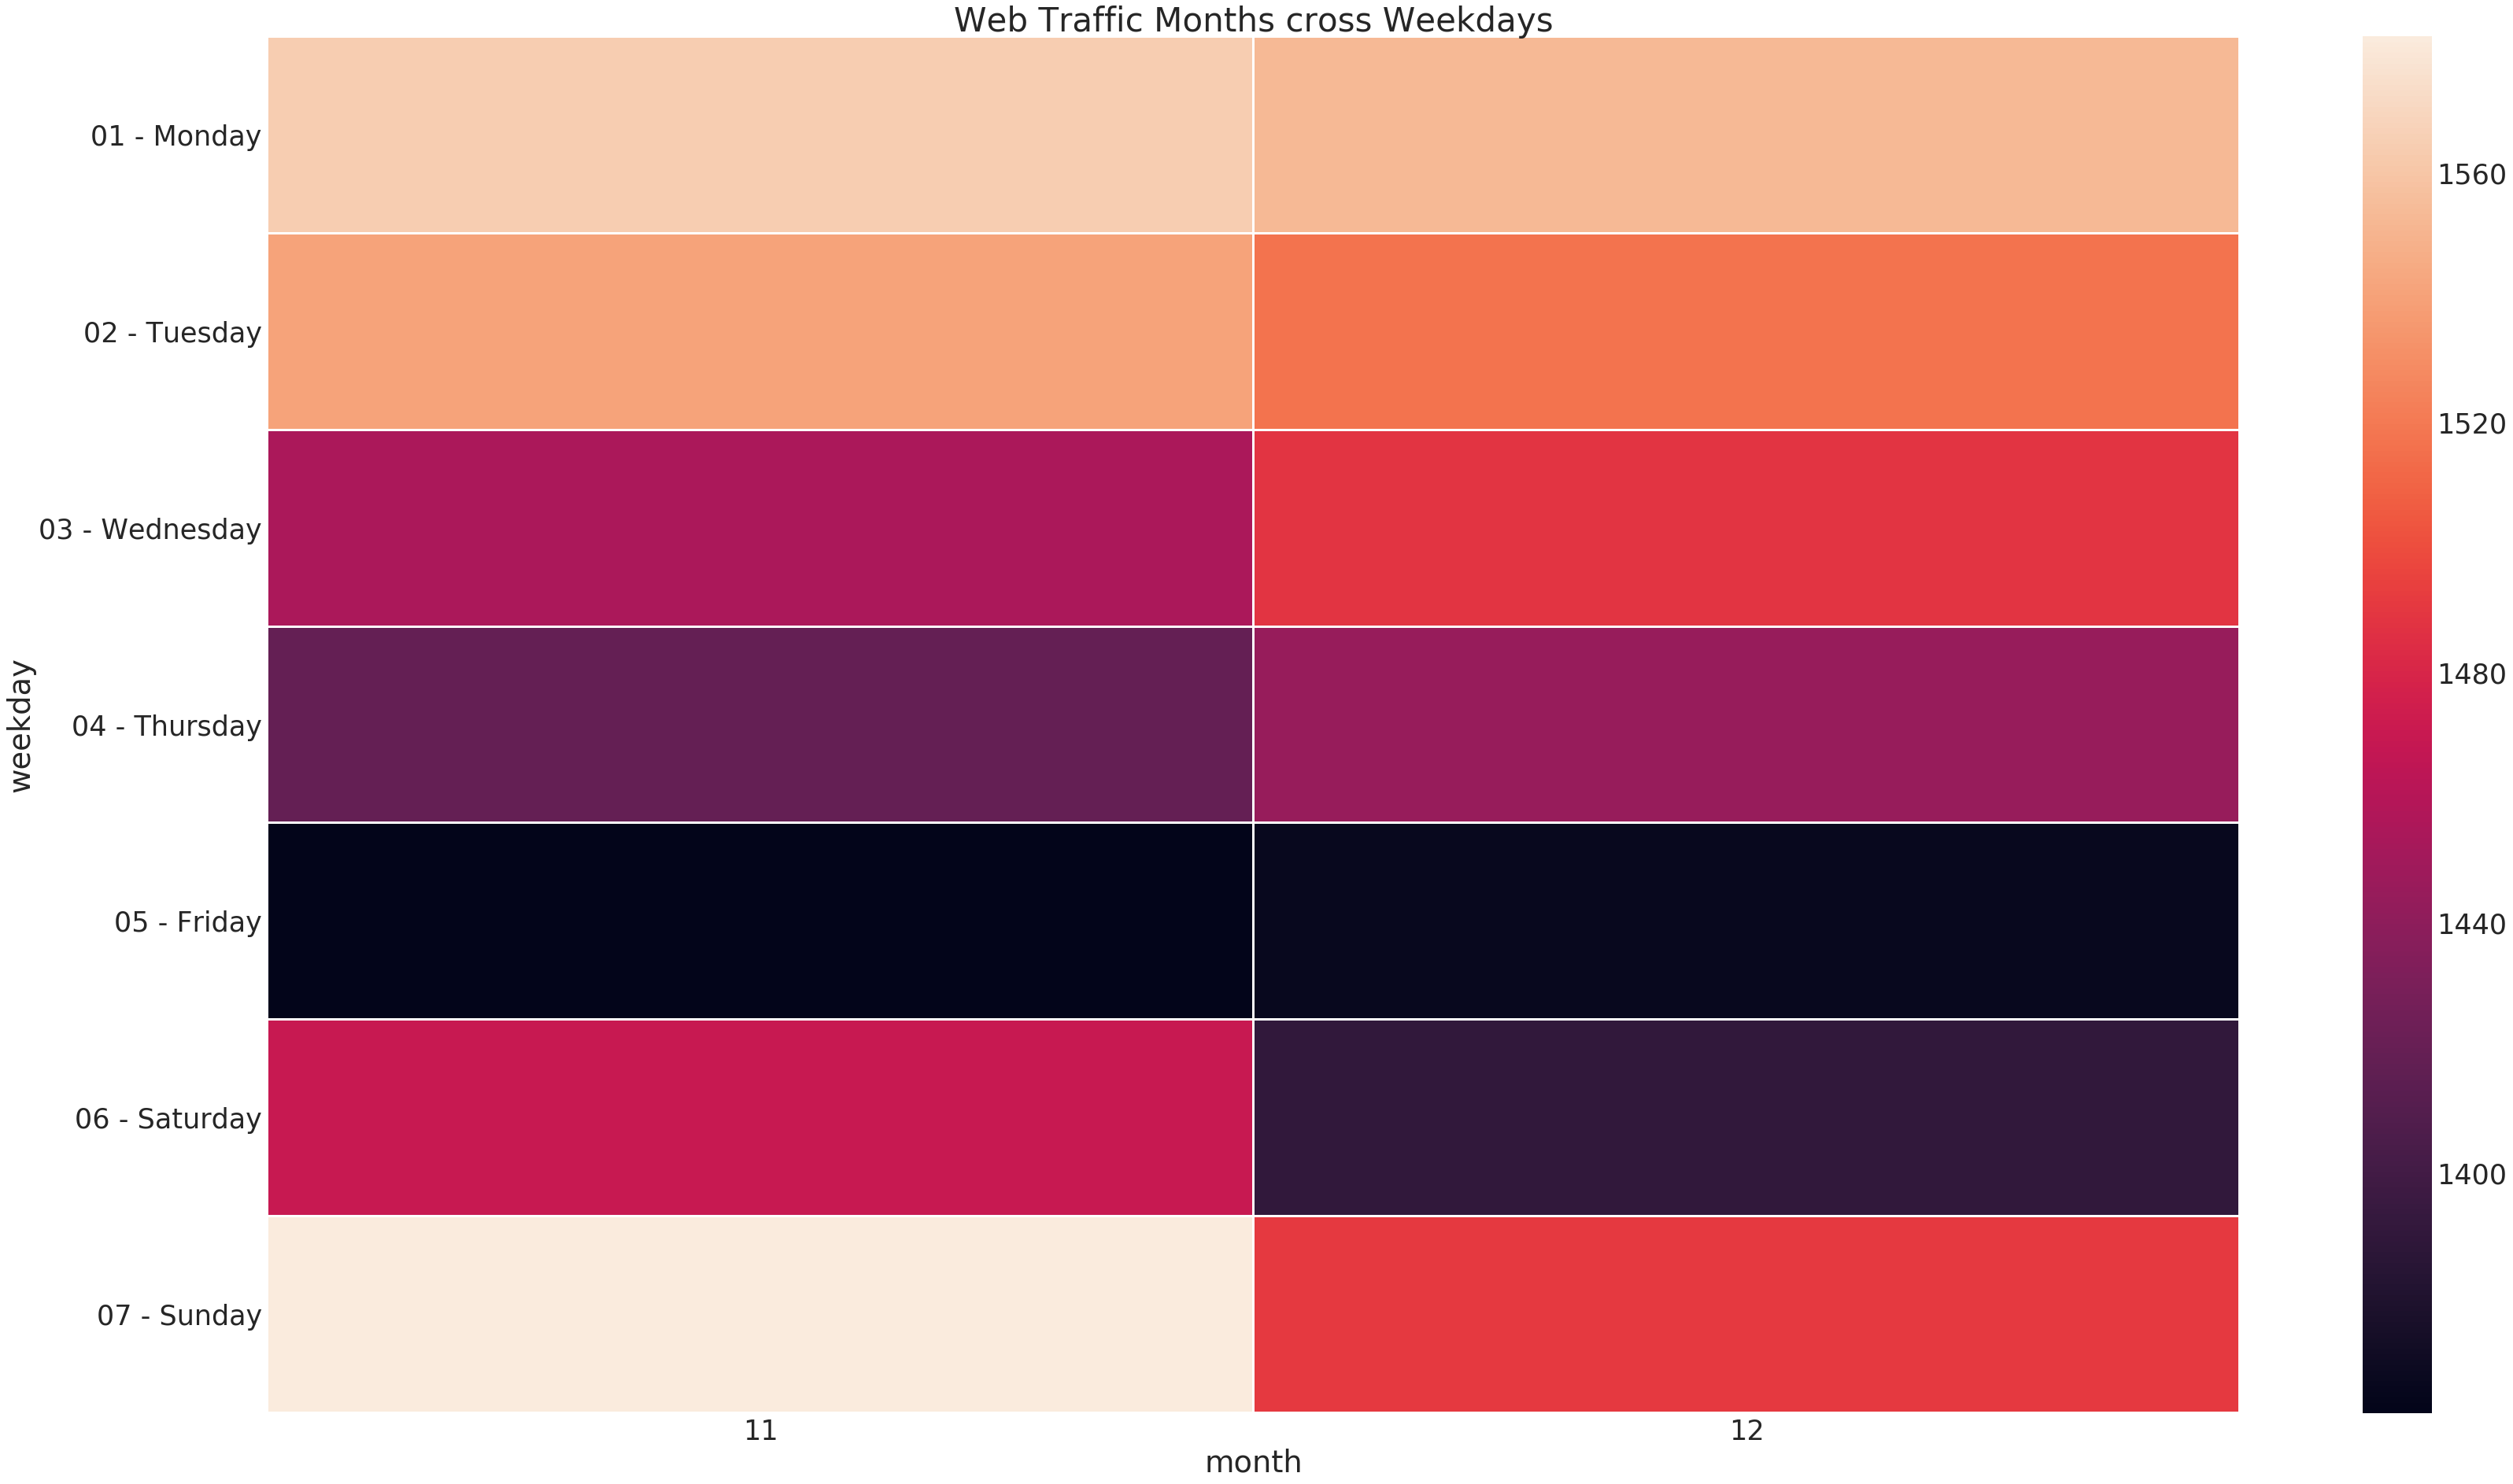

In [28]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

This heatmap show us in average the web traffic by weekdays cross the months. In our data we can see there are less activity in Friday and Saturday for December and November. And the biggest traffic is on the period Monday - Wednesday. It is possible to do Statistics Test to check if our intuition is ok. But You have a lot of works ! 

In [29]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

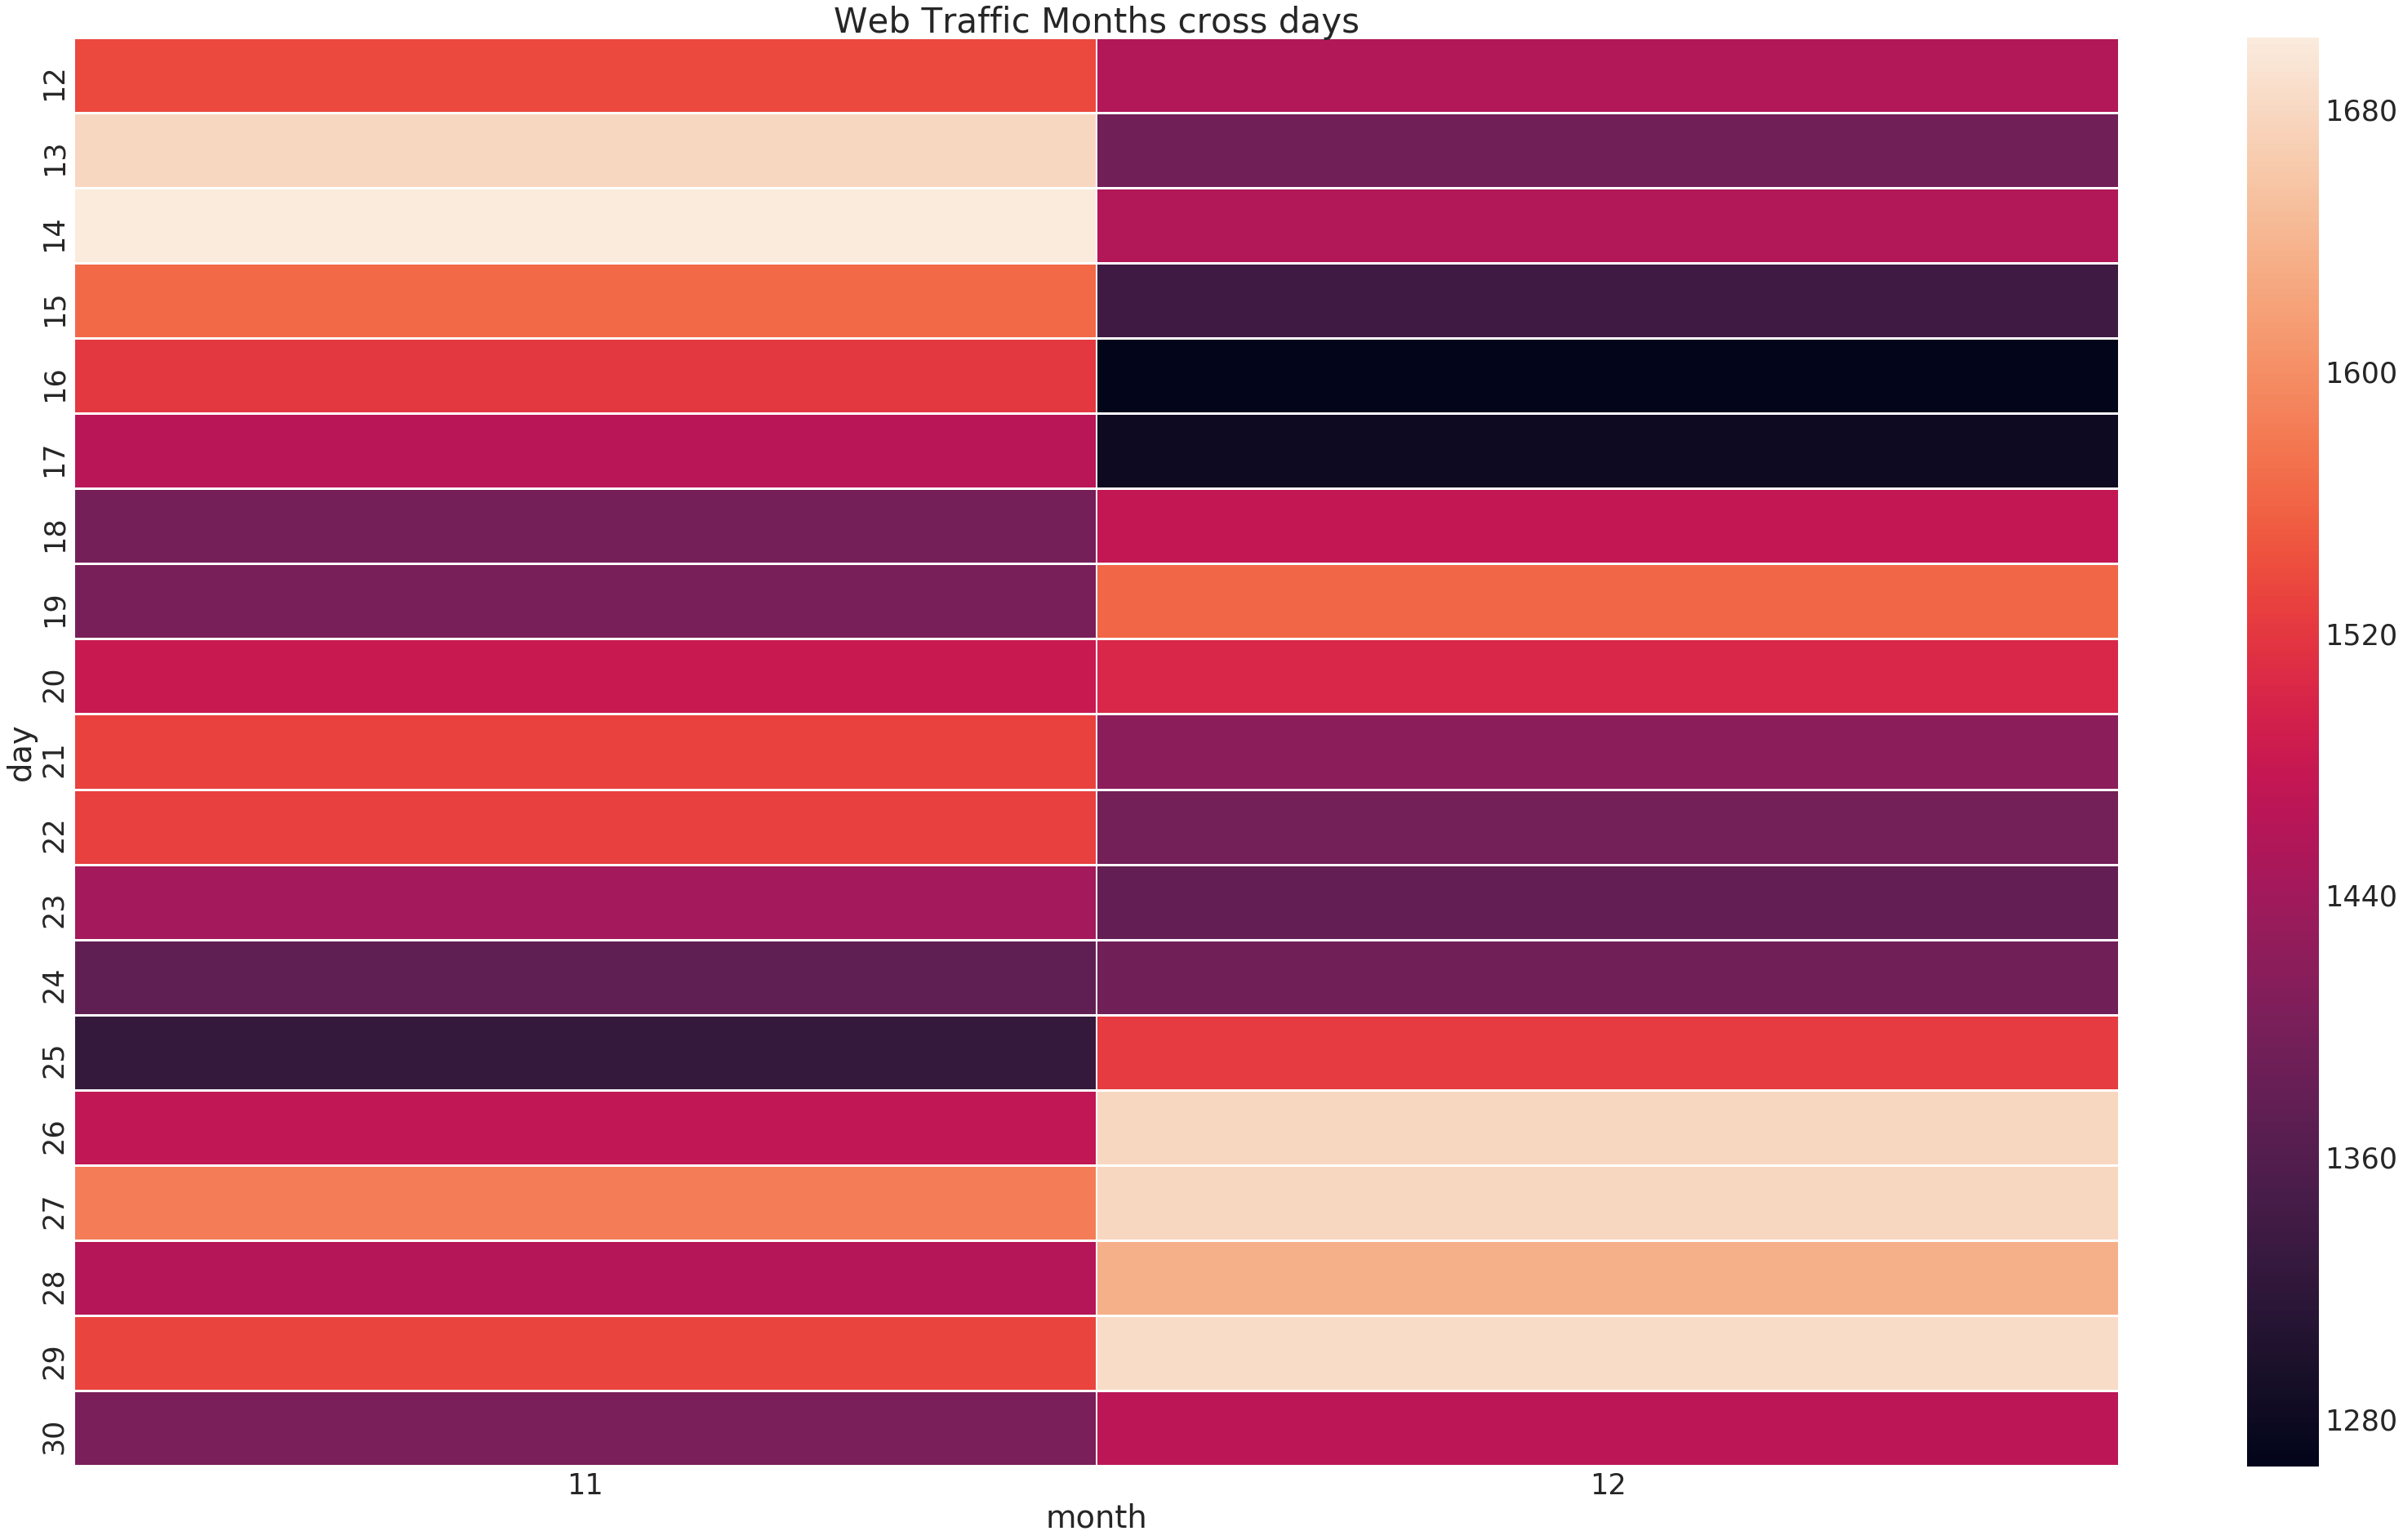

In [30]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()

With this graph it is possible to see they are two periods with a bigger activity than the rest. The two periods are 25-29 December and 13-14 November. And we can see one period with little activity 15-17 December. They are maybe few outliers during these two periods. You must to investigate more. (coming soon...)

#  <h1><center>V. ARIMA

This part is inspired by: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
Very goodjob with the ARIMA models ! It is more simple when we have directly a stationary Time series. It is not our case...

We will use the Dickey-Fuller Test. More informations here: https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

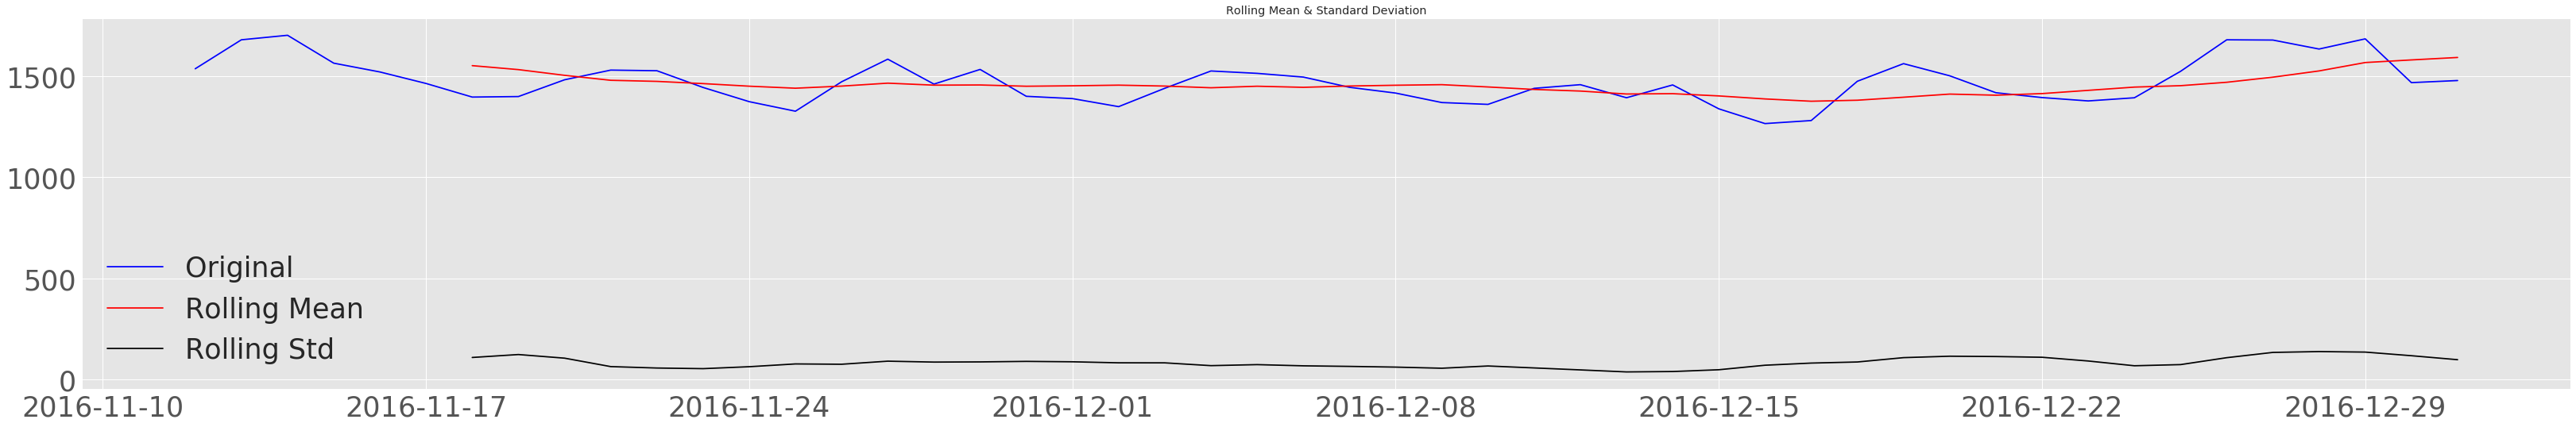

Results of Dickey-Fuller Test:
Test Statistic                 -4.292839
p-value                         0.000457
#Lags Used                      1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [48]:
# Show Rolling mean, Rolling Std and Test for the stationnarity
df_date_index = times_series_means[['date','Visits']].set_index('date')

def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_date_index)   

Our Time Series is stationary ! it is a good news ! We can to apply the ARIMA Model without transformations.

Good job ! We have a Time Series Stationary ! We can apply our ARIMA Model !!!

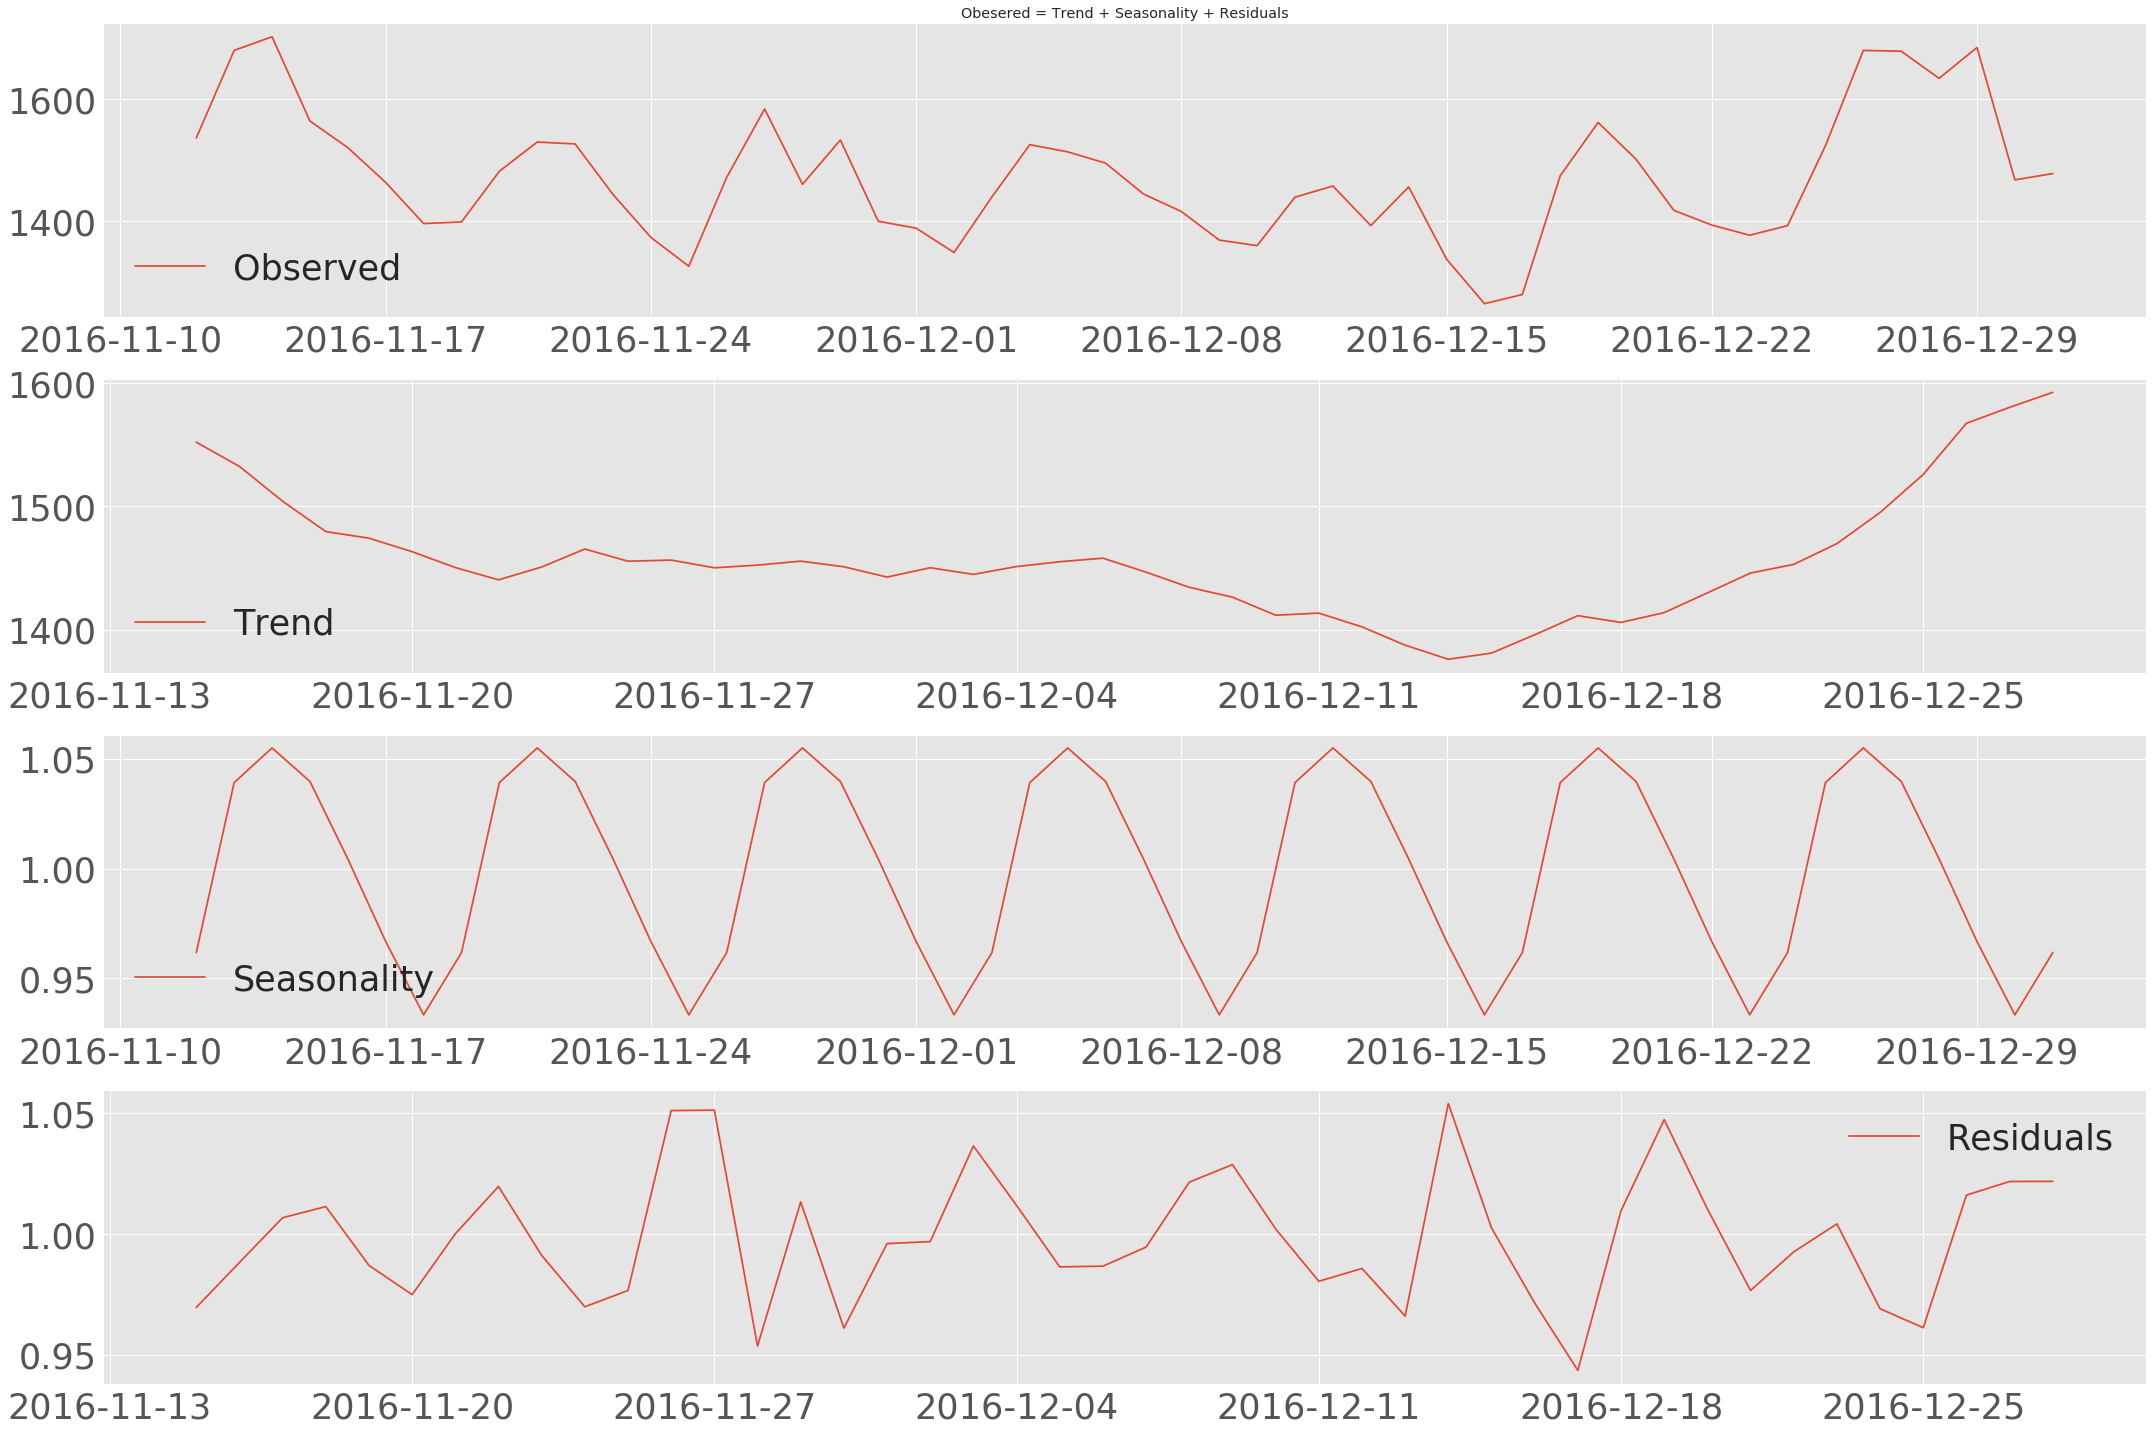

In [49]:
# Naive decomposition of our Time Series as explained above
decomposition = sm.tsa.seasonal_decompose(df_date_index, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
rcParams['figure.figsize'] = 30, 20

plt.subplot(411)
plt.title('Obesered = Trend + Seasonality + Residuals')
plt.plot(df_date_index, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We expose the naive decomposition of our time series (More sophisticated methods should be preferred). They are several ways to decompose a time series but in our example we take a simple decomposition on three parts.
The additive model is Y[t] = T[t] + S[t] + e[t]
The multiplicative model is Y[t] = T[t] x S[t] x e[t]
with:

 1. T[t]: Trend 
 2. S[t]: Seasonality 
 3. e[t]: Residual

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line.A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
In ou example we can see it is not a linear model. So it is the reason why we use a multiplicative model.